# Logistic Regression

#### Imports

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from importlib import reload

In [122]:
reload(utils);
plt.style.use('./styles.txt')

#### Index

## Introduction

*TODO*

### Loading Data

In [125]:
df_1 = pd.read_pickle('sample_data/30k_engineered.pkl')
df_2 = pd.read_pickle('sample_data/large_fires_cleaned.pkl')

In [126]:
df_1.head()

DATE  FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE  \
0 1992-01-01       1992              1       0.10               A  43.325000   
1 1992-01-01       1992              1       1.00               B  33.058333   
2 1992-01-02       1992              2       0.25               A  40.775000   
3 1992-01-03       1992              3       1.91               B  31.018500   
4 1992-01-03       1992              3       2.00               B  30.728900   

    LONGITUDE STATE  avg_tempmax   avg_temp  ...  precip_variance  \
0 -101.018500    SD     5.257143  -2.928571  ...         0.000000   
1  -79.979167    SC    13.700000   9.885714  ...        55.589796   
2  -74.854160    NJ     6.385714   1.585714  ...         9.546510   
3  -83.297300    GA    14.457143  11.828571  ...        59.321224   
4  -87.238100    FL    14.428571  10.985714  ...         0.213355   

   precip_delta  dew_variance  dew_delta  windspeed_variance  windspeed_delta  \
0          0.00      5.399184        3.5           47.062041             -1.8   
1         -4.40      7.196327        0.1            5.575510              2.0   
2          0.00     19.731020        4.0           34.516735            -10.6   
3         -9.70      9.142041       -4.1           11.228571              0.2   
4         -1.32     10.262857       -7.9           27.382857              6.7   

   winddir_variance  winddir_delta  pressure_variance  pressure_delta  
0       1889.074286          -48.6          28.913469            -4.3  
1      15648.559592          -14.9          19.071020             2.4  
2      16492.948163         -254.6          75.711429            -0.9  
3      16679.204898          223.6          21.585306            -8.4  
4      19587.093469          -24.8          13.107755            -2.7  

[5 rows x 35 columns]

In [127]:
df_2.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE  LONGITUDE  \
0       2003            104      232.0               D  41.363889 -88.173056   
1       1992             52      150.0               D  34.587299 -95.611298   
2       2010            166      277.0               D  27.001200 -81.436200   
3       1992            120      125.0               D  45.966667 -68.466668   
4       2011             71      285.0               D  36.279960 -93.945460   

  STATE  avg_tempmax   avg_temp  avg_humidity  ...  precip_variance  \
0    IL    14.057143   8.014286     54.885714  ...         0.000000   
1    OK    18.571429  11.485714     53.085714  ...         0.000000   
2    FL    33.828571  27.514286     75.757143  ...         0.556367   
3    ME     8.757143   3.514286     62.514286  ...         0.000000   
4    AR    13.471429   7.214286     64.271429  ...         0.188278   

   precip_delta  dew_variance  dew_delta  windspeed_variance  windspeed_delta  \
0          0.00      7.864898        5.5           31.552653             11.3   
1          0.00      5.124898       -3.0           12.656327              3.6   
2          0.25      1.770612        2.8            8.504082             -4.2   
3          0.00     12.290612       -7.2           17.136735             12.9   
4          0.00     12.262041        3.8           45.435510              2.2   

   winddir_variance  winddir_delta  pressure_variance  pressure_delta  
0       4393.119592          160.9          16.827755            -9.5  
1       5591.173469         -160.7          28.450612             6.2  
2       6388.276735          -65.9           0.568163            -0.6  
3       4668.631429          141.8           4.495510            -2.9  
4       8314.153878          -39.5          24.979184            -6.0  

[5 rows x 34 columns]

In [128]:
# Check that the shapes match
df_1.shape[1] == df_2.shape[1] 

False

In [129]:
# Drop index column
df_1.drop('DATE', axis=1, inplace=True)

In [130]:
# Check that the shapes match
df_1.shape[1] == df_2.shape[1] 

True

In [131]:
df = pd.concat([df_1, df_2])

In [132]:
df.shape

(29734, 34)

In [133]:
# Check that they were added
df.shape[0] == df_1.shape[0] + df_2.shape[0]

True

In [134]:
df.head(2)

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE   LONGITUDE  \
0       1992              1        0.1               A  43.325000 -101.018500   
1       1992              1        1.0               B  33.058333  -79.979167   

  STATE  avg_tempmax  avg_temp  avg_humidity  ...  precip_variance  \
0    SD     5.257143 -2.928571     81.142857  ...         0.000000   
1    SC    13.700000  9.885714     81.428571  ...        55.589796   

   precip_delta  dew_variance  dew_delta  windspeed_variance  windspeed_delta  \
0           0.0      5.399184        3.5           47.062041             -1.8   
1          -4.4      7.196327        0.1            5.575510              2.0   

   winddir_variance  winddir_delta  pressure_variance  pressure_delta  
0       1889.074286          -48.6          28.913469            -4.3  
1      15648.559592          -14.9          19.071020             2.4  

[2 rows x 34 columns]

In [135]:
df.reset_index(drop=True, inplace=True)

In [136]:
df.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE   LONGITUDE  \
0       1992              1       0.10               A  43.325000 -101.018500   
1       1992              1       1.00               B  33.058333  -79.979167   
2       1992              2       0.25               A  40.775000  -74.854160   
3       1992              3       1.91               B  31.018500  -83.297300   
4       1992              3       2.00               B  30.728900  -87.238100   

  STATE  avg_tempmax   avg_temp  avg_humidity  ...  precip_variance  \
0    SD     5.257143  -2.928571     81.142857  ...         0.000000   
1    SC    13.700000   9.885714     81.428571  ...        55.589796   
2    NJ     6.385714   1.585714     67.185714  ...         9.546510   
3    GA    14.457143  11.828571     78.957143  ...        59.321224   
4    FL    14.428571  10.985714     79.971429  ...         0.213355   

   precip_delta  dew_variance  dew_delta  windspeed_variance  windspeed_delta  \
0          0.00      5.399184        3.5           47.062041             -1.8   
1         -4.40      7.196327        0.1            5.575510              2.0   
2          0.00     19.731020        4.0           34.516735            -10.6   
3         -9.70      9.142041       -4.1           11.228571              0.2   
4         -1.32     10.262857       -7.9           27.382857              6.7   

   winddir_variance  winddir_delta  pressure_variance  pressure_delta  
0       1889.074286          -48.6          28.913469            -4.3  
1      15648.559592          -14.9          19.071020             2.4  
2      16492.948163         -254.6          75.711429            -0.9  
3      16679.204898          223.6          21.585306            -8.4  
4      19587.093469          -24.8          13.107755            -2.7  

[5 rows x 34 columns]

### Preparation for Logistic Regression

If we are creating a logistic regression model we want to ensure that we have a fairly even split between our samples. 

In [137]:
utils.count_percentage_df(df['FIRE_SIZE_CLASS'])

Count  Percentage of Total
B  10529             0.354106
A   7355             0.247360
D   2728             0.091747
E   2494             0.083877
C   2441             0.082095
F   2222             0.074729
G   1965             0.066086

This is far better than the distribution we had previously, where `FIRE_SIZE_CLASS` G only accounted for 0.1% of our entire data. That being said, the larger fires are being underrepresented, meaning that we will have to use some form of upsampling method later on in to improve this.

## Preprocessing

In [138]:
numeric_df = df.select_dtypes('number').copy()
categorical_df = df.select_dtypes('object').copy()

In [139]:
print("Numeric columns: \n", ',\n '.join(numeric_df.columns))
print("Categorical columns: \n", ', \n '.join(categorical_df.columns))

Numeric columns: 
 FIRE_YEAR,
 DISCOVERY_DOY,
 FIRE_SIZE,
 LATITUDE,
 LONGITUDE,
 avg_tempmax,
 avg_temp,
 avg_humidity,
 avg_precip,
 avg_dew,
 avg_windspeed,
 avg_winddir,
 avg_pressure,
 ch4,
 co2,
 n2o,
 tempmax_variance,
 tempmax_delta,
 temp_variance,
 temp_delta,
 humidity_variance,
 humidity_delta,
 precip_variance,
 precip_delta,
 dew_variance,
 dew_delta,
 windspeed_variance,
 windspeed_delta,
 winddir_variance,
 winddir_delta,
 pressure_variance,
 pressure_delta
Categorical columns: 
 FIRE_SIZE_CLASS, 
 STATE


In [140]:
numeric_df.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE   LATITUDE   LONGITUDE  avg_tempmax  \
0       1992              1       0.10  43.325000 -101.018500     5.257143   
1       1992              1       1.00  33.058333  -79.979167    13.700000   
2       1992              2       0.25  40.775000  -74.854160     6.385714   
3       1992              3       1.91  31.018500  -83.297300    14.457143   
4       1992              3       2.00  30.728900  -87.238100    14.428571   

    avg_temp  avg_humidity  avg_precip   avg_dew  ...  precip_variance  \
0  -2.928571     81.142857    0.000000 -6.071429  ...         0.000000   
1   9.885714     81.428571    4.185714  6.671429  ...        55.589796   
2   1.585714     67.185714    1.394286 -4.242857  ...         9.546510   
3  11.828571     78.957143    4.685714  8.128571  ...        59.321224   
4  10.985714     79.971429    0.188571  7.500000  ...         0.213355   

   precip_delta  dew_variance  dew_delta  windspeed_variance  windspeed_delta  \
0          0.00      5.399184        3.5           47.062041             -1.8   
1         -4.40      7.196327        0.1            5.575510              2.0   
2          0.00     19.731020        4.0           34.516735            -10.6   
3         -9.70      9.142041       -4.1           11.228571              0.2   
4         -1.32     10.262857       -7.9           27.382857              6.7   

   winddir_variance  winddir_delta  pressure_variance  pressure_delta  
0       1889.074286          -48.6          28.913469            -4.3  
1      15648.559592          -14.9          19.071020             2.4  
2      16492.948163         -254.6          75.711429            -0.9  
3      16679.204898          223.6          21.585306            -8.4  
4      19587.093469          -24.8          13.107755            -2.7  

[5 rows x 32 columns]

In [141]:
categorical_df.head(2)

FIRE_SIZE_CLASS STATE
0               A    SD
1               B    SC

### Preprocessing Categorical Data

In [142]:
categorical_df.nunique().sort_values()

FIRE_SIZE_CLASS     7
STATE              52
dtype: int64

#### Processing `STATE`

While previously we decided to numerically encode the `FIRE_SIZE_CLASS`, in this model we will use it as our target variable, meaning that we do not need to process this column. Instead we will solely focus on encoding the `STATE` column using `pd.getdummies()`.

In [143]:
state_dummies = pd.get_dummies(categorical_df['STATE'], prefix='state')

In [144]:
state_dummies.head()

state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_DC  state_DE  state_FL  ...  state_SD  state_TN  state_TX  state_UT  \
0         0         0         0  ...         1         0         0         0   
1         0         0         0  ...         0         0         0         0   
2         0         0         0  ...         0         0         0         0   
3         0         0         0  ...         0         0         0         0   
4         0         0         1  ...         0         0         0         0   

   state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  
0         0         0         0         0         0         0  
1         0         0         0         0         0         0  
2         0         0         0         0         0         0  
3         0         0         0         0         0         0  
4         0         0         0         0         0         0  

[5 rows x 52 columns]

In [145]:
categorical_df = pd.concat([categorical_df, state_dummies], axis=1)

In [146]:
categorical_df.head(2)

FIRE_SIZE_CLASS STATE  state_AK  state_AL  state_AR  state_AZ  state_CA  \
0               A    SD         0         0         0         0         0   
1               B    SC         0         0         0         0         0   

   state_CO  state_CT  state_DC  ...  state_SD  state_TN  state_TX  state_UT  \
0         0         0         0  ...         1         0         0         0   
1         0         0         0  ...         0         0         0         0   

   state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  
0         0         0         0         0         0         0  
1         0         0         0         0         0         0  

[2 rows x 54 columns]

In [147]:
categorical_df.drop('STATE', axis=1, inplace=True)

In [148]:
categorical_df.head(2)

FIRE_SIZE_CLASS  state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  \
0               A         0         0         0         0         0         0   
1               B         0         0         0         0         0         0   

   state_CT  state_DC  state_DE  ...  state_SD  state_TN  state_TX  state_UT  \
0         0         0         0  ...         1         0         0         0   
1         0         0         0  ...         0         0         0         0   

   state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  
0         0         0         0         0         0         0  
1         0         0         0         0         0         0  

[2 rows x 53 columns]

### Processing Numerical Columns

In [149]:
numeric_df.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE   LATITUDE   LONGITUDE  avg_tempmax  \
0       1992              1       0.10  43.325000 -101.018500     5.257143   
1       1992              1       1.00  33.058333  -79.979167    13.700000   
2       1992              2       0.25  40.775000  -74.854160     6.385714   
3       1992              3       1.91  31.018500  -83.297300    14.457143   
4       1992              3       2.00  30.728900  -87.238100    14.428571   

    avg_temp  avg_humidity  avg_precip   avg_dew  ...  precip_variance  \
0  -2.928571     81.142857    0.000000 -6.071429  ...         0.000000   
1   9.885714     81.428571    4.185714  6.671429  ...        55.589796   
2   1.585714     67.185714    1.394286 -4.242857  ...         9.546510   
3  11.828571     78.957143    4.685714  8.128571  ...        59.321224   
4  10.985714     79.971429    0.188571  7.500000  ...         0.213355   

   precip_delta  dew_variance  dew_delta  windspeed_variance  windspeed_delta  \
0          0.00      5.399184        3.5           47.062041             -1.8   
1         -4.40      7.196327        0.1            5.575510              2.0   
2          0.00     19.731020        4.0           34.516735            -10.6   
3         -9.70      9.142041       -4.1           11.228571              0.2   
4         -1.32     10.262857       -7.9           27.382857              6.7   

   winddir_variance  winddir_delta  pressure_variance  pressure_delta  
0       1889.074286          -48.6          28.913469            -4.3  
1      15648.559592          -14.9          19.071020             2.4  
2      16492.948163         -254.6          75.711429            -0.9  
3      16679.204898          223.6          21.585306            -8.4  
4      19587.093469          -24.8          13.107755            -2.7  

[5 rows x 32 columns]

In [150]:
utils.HistogramSubplots(numeric_df.drop('FIRE_SIZE', axis=1))

As we can see, certain distributions are not normally distributed. The variance calculations, for example, are all skewed to the right. We can therefore transform these columns using a Box-Cox transformation. To apply a Box-Cox transformation however, the variance can not equal 0, meaning that precipitation variance can not be transformed.

In [151]:
from scipy.stats import boxcox

boxcox_cols = [col for col in numeric_df.columns
               if 'variance' in col]

boxcox_cols.remove('precip_variance')

for col in boxcox_cols:
    numeric_df[col] = boxcox(numeric_df[col])[0]

In [152]:
numeric_df.head(2)

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE   LATITUDE   LONGITUDE  avg_tempmax  \
0       1992              1        0.1  43.325000 -101.018500     5.257143   
1       1992              1        1.0  33.058333  -79.979167    13.700000   

   avg_temp  avg_humidity  avg_precip   avg_dew  ...  precip_variance  \
0 -2.928571     81.142857    0.000000 -6.071429  ...         0.000000   
1  9.885714     81.428571    4.185714  6.671429  ...        55.589796   

   precip_delta  dew_variance  dew_delta  windspeed_variance  windspeed_delta  \
0           0.0      1.969620        3.5            5.226522             -1.8   
1          -4.4      2.368858        0.1            1.962302              2.0   

   winddir_variance  winddir_delta  pressure_variance  pressure_delta  
0         63.723124          -48.6           4.150127            -4.3  
1        168.249044          -14.9           3.540947             2.4  

[2 rows x 32 columns]

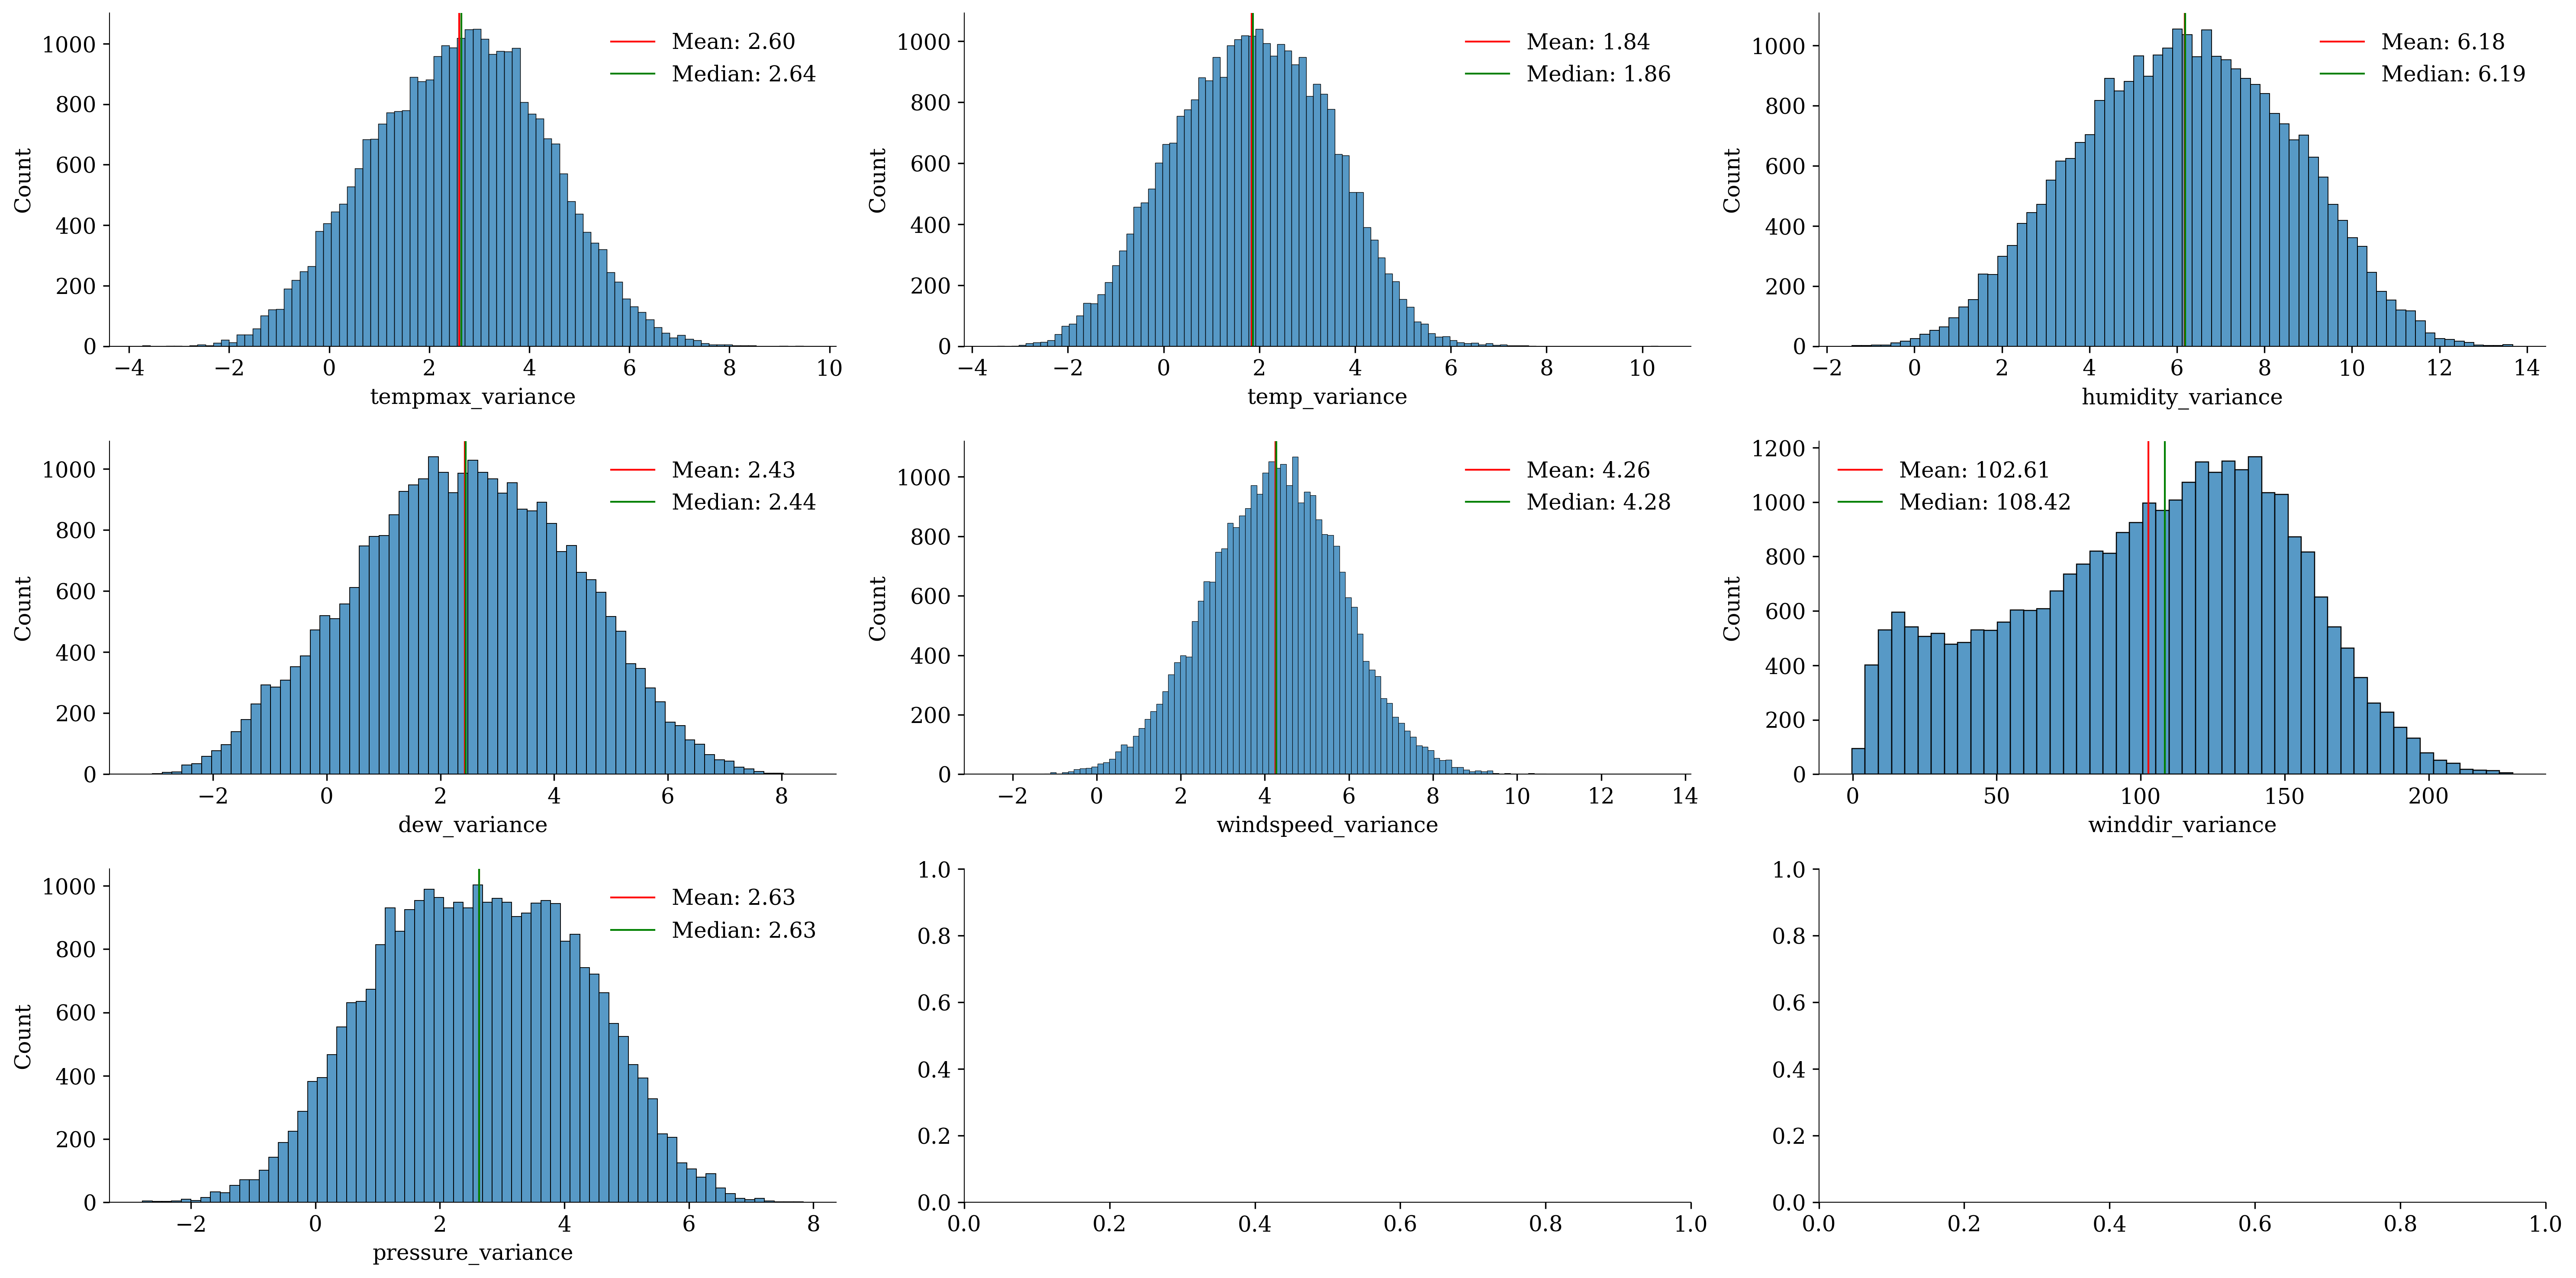

In [153]:
utils.HistogramSubplots(numeric_df[boxcox_cols], figsize=(20,10))

After the transformations, we see that the columns now resemble a normal distribution. The remaining columns will not be transformed, but instead will be scaled using different scalers.

Now that we have processed the numeric and categorical columns we can now combine these into a DataFrame.

In [154]:
df = pd.concat([numeric_df, categorical_df], axis=1)

In [155]:
df.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE   LATITUDE   LONGITUDE  avg_tempmax  \
0       1992              1       0.10  43.325000 -101.018500     5.257143   
1       1992              1       1.00  33.058333  -79.979167    13.700000   
2       1992              2       0.25  40.775000  -74.854160     6.385714   
3       1992              3       1.91  31.018500  -83.297300    14.457143   
4       1992              3       2.00  30.728900  -87.238100    14.428571   

    avg_temp  avg_humidity  avg_precip   avg_dew  ...  state_SD  state_TN  \
0  -2.928571     81.142857    0.000000 -6.071429  ...         1         0   
1   9.885714     81.428571    4.185714  6.671429  ...         0         0   
2   1.585714     67.185714    1.394286 -4.242857  ...         0         0   
3  11.828571     78.957143    4.685714  8.128571  ...         0         0   
4  10.985714     79.971429    0.188571  7.500000  ...         0         0   

   state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_WY  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 85 columns]

## Logistic Regression Model

To begin, we want to get an even amount of samples from each.

In [156]:
df_condensed = pd.DataFrame()

fire_classes = df['FIRE_SIZE_CLASS'].unique()

for fire_class in fire_classes:
    tmp = df[df['FIRE_SIZE_CLASS'] == fire_class]
    df_condensed = pd.concat([df_condensed, tmp.sample(1965)])

In [157]:
df_condensed.shape

(13755, 85)

In [158]:
utils.count_percentage_df(df_condensed['FIRE_SIZE_CLASS'])

Count  Percentage of Total
A   1965             0.142857
B   1965             0.142857
C   1965             0.142857
D   1965             0.142857
E   1965             0.142857
F   1965             0.142857
G   1965             0.142857

In [163]:
from sklearn.model_selection import train_test_split

X = df_condensed.drop(['FIRE_SIZE','FIRE_SIZE_CLASS'], axis=1)
y = df_condensed['FIRE_SIZE_CLASS']

# Create remainder and test
X_rem, X_test, y_rem, y_test = \
train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Create train and validation
X_train, X_validation, y_train, y_validation = \
train_test_split(X_rem, y_rem, test_size=0.3, random_state=1, stratify=y_rem)

In [164]:
robust_cols = ['precip_variance', 'ch4', 'n2o', 'co2']
minmax_cols = ['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE']
state_cols = [col for col in X_train.columns
              if 'state' in col]
ss_cols = [col for col in X_train.columns
           if col not in robust_cols
           if col not in minmax_cols
           if col not in state_cols]

In [165]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Create column transformation list
col_transforms = [('standard scale', StandardScaler(), ss_cols),
                  ('minmax scale', MinMaxScaler(), minmax_cols), 
                  ('robust scale', RobustScaler(), robust_cols)]

# Create the column transformer
col_transformer = ColumnTransformer(col_transforms, remainder='passthrough')

# Fit to X_train
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard scale', StandardScaler(),
                                 ['avg_tempmax', 'avg_temp', 'avg_humidity',
                                  'avg_precip', 'avg_dew', 'avg_windspeed',
                                  'avg_winddir', 'avg_pressure',
                                  'tempmax_variance', 'tempmax_delta',
                                  'temp_variance', 'temp_delta',
                                  'humidity_variance', 'humidity_delta',
                                  'precip_delta', 'dew_variance', 'dew_delta',
                                  'windspeed_variance', 'windspeed_delta',
                                  'winddir_variance', 'winddir_delta',
                                  'pressure_variance', 'pressure_delta']),
                                ('minmax scale', MinMaxScaler(),
                                 ['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE',
                    

In [166]:
X_train_transformed = col_transformer.transform(X_train)
X_validation_transformed = col_transformer.transform(X_validation)

In [167]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, random_state=1)
logreg.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=10000, random_state=1)

In [168]:
logreg.score(X_train_transformed, y_train)

0.3384835107764217

In [169]:
X_test_transformed =  col_transformer.transform(X_test)
logreg.score(X_test_transformed, y_test)

0.30716103235187203

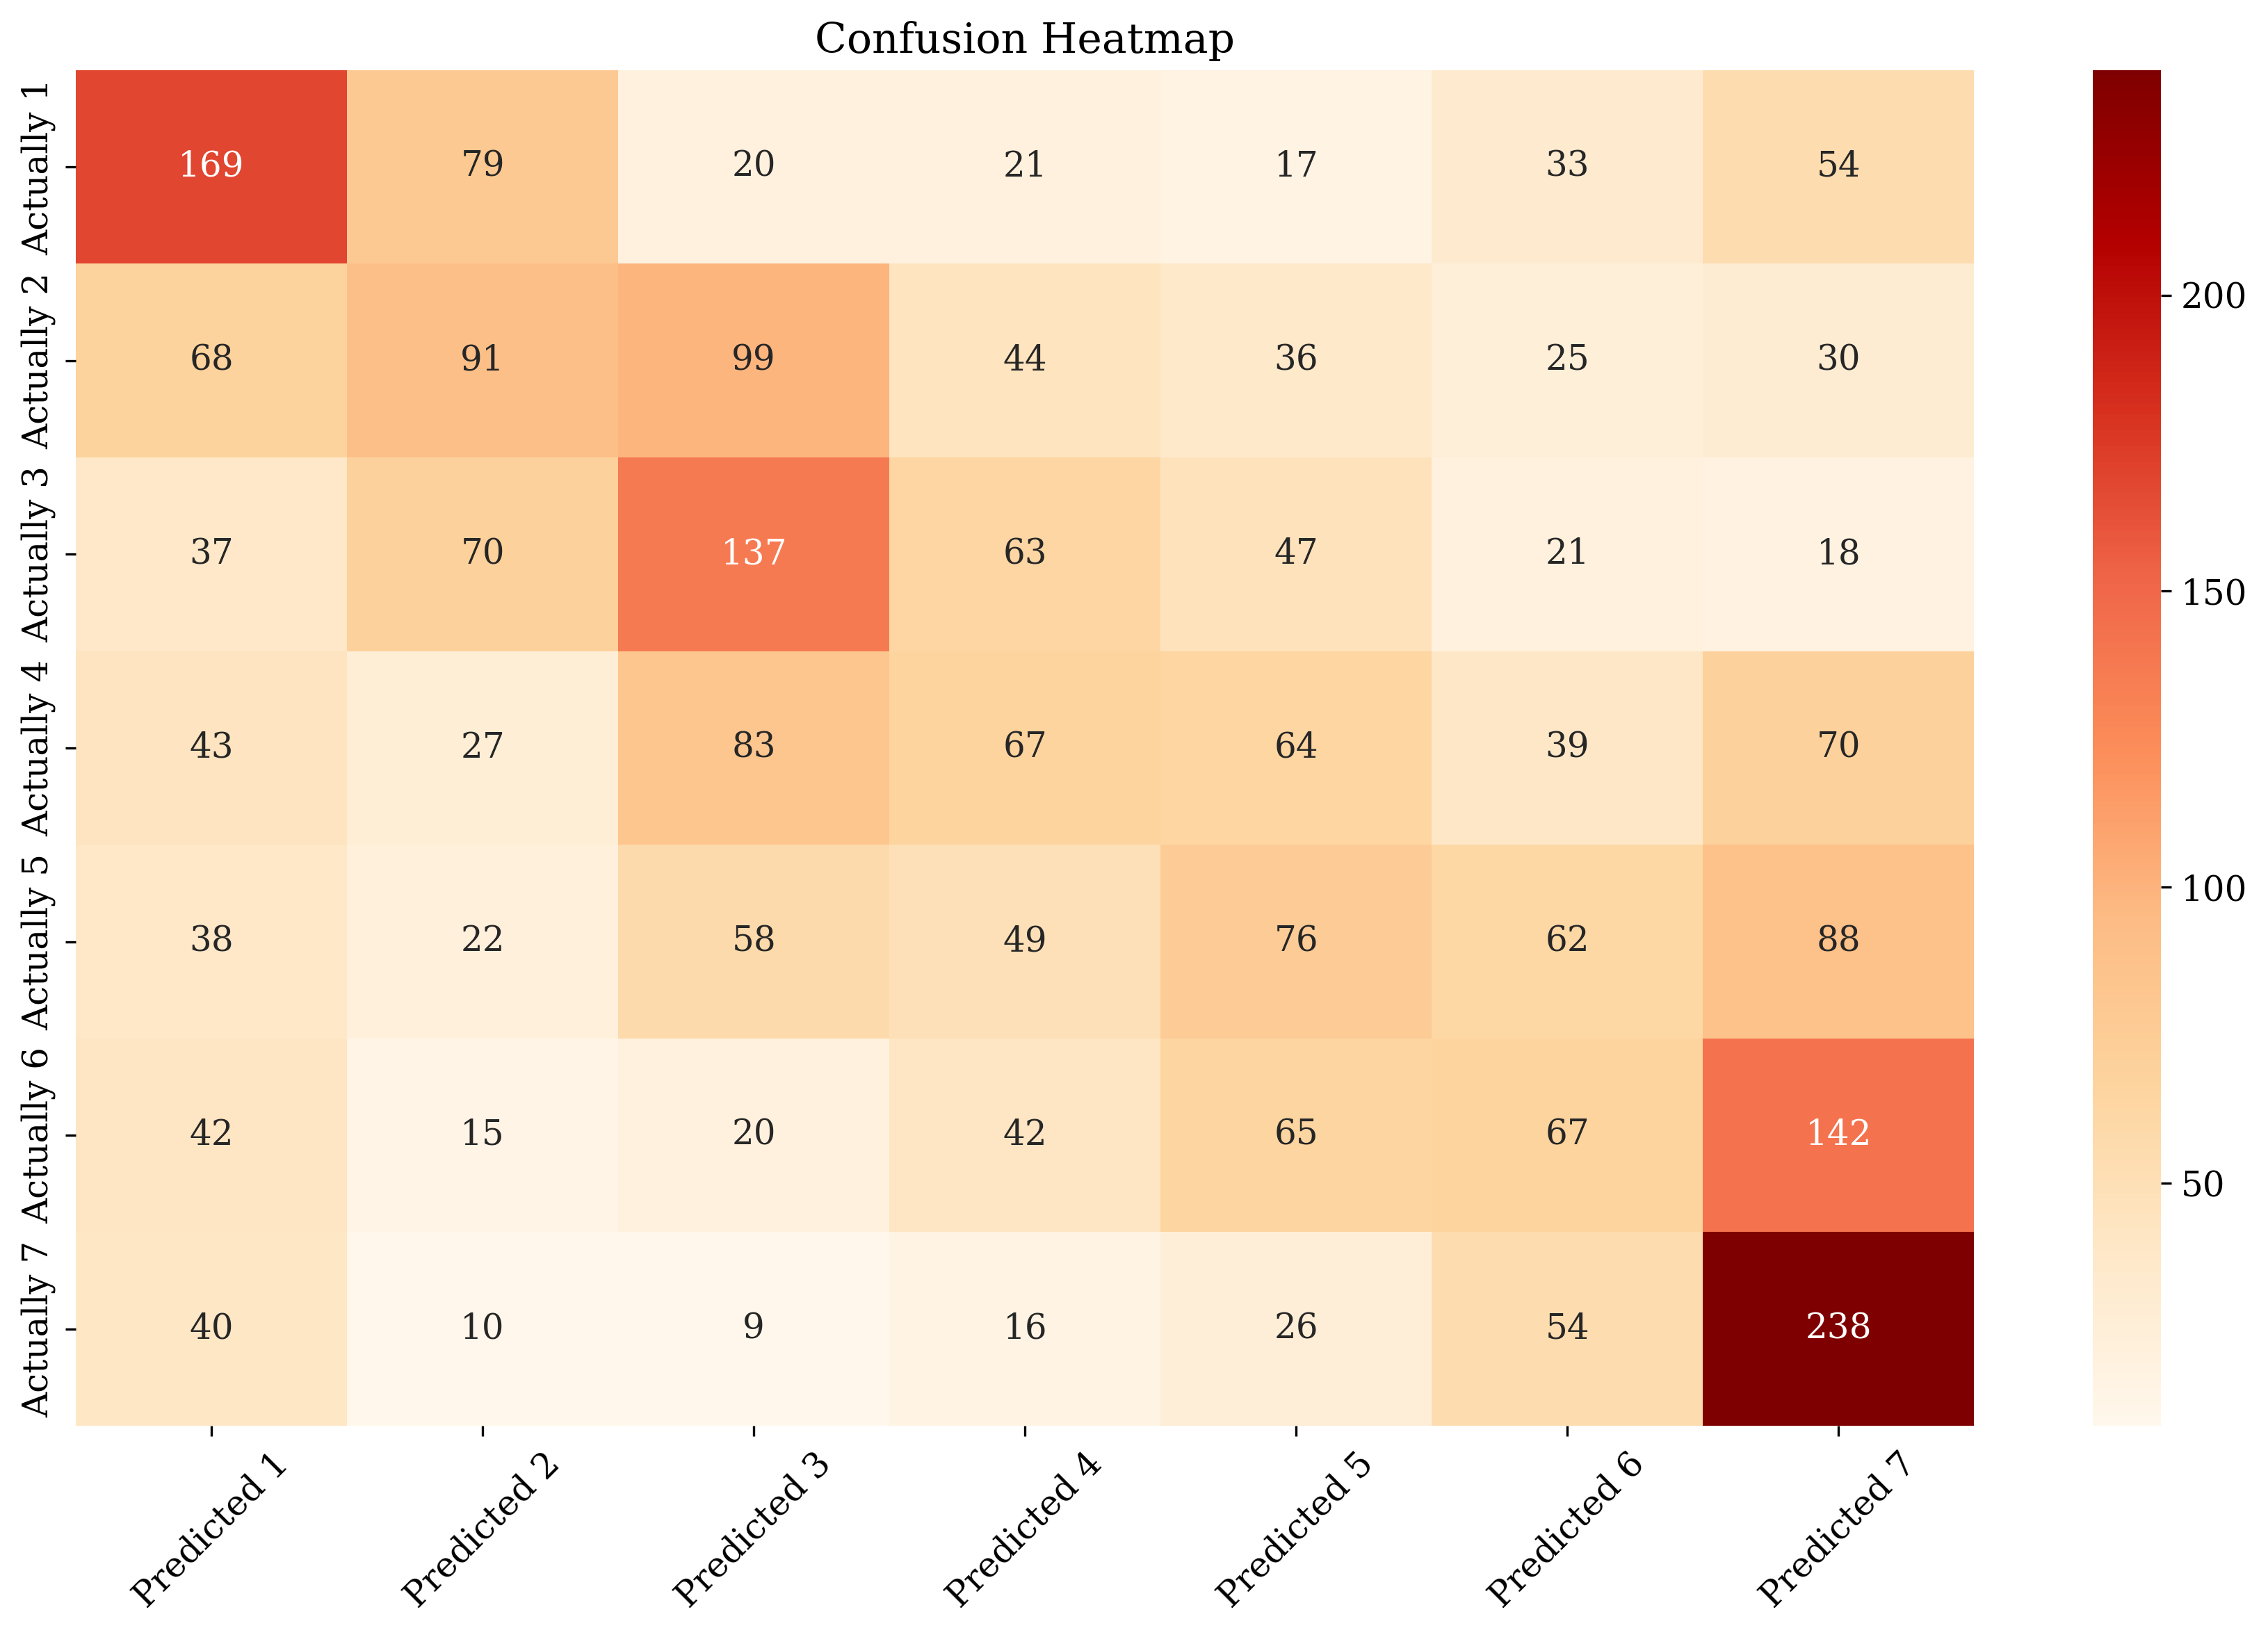

In [170]:
from sklearn.metrics import confusion_matrix

# Make classifications based on the test features, and assign the classifications to a variable
y_pred = logreg.predict(X_test_transformed)

# Build the confusion matrix as a dataframe
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
confusion_df.index = [f'Actually {i}' for i in range(1, 8)]
confusion_df.columns = [f'Predicted {i}' for i in range(1, 8)]

# Heatmap of the above
plt.figure(figsize=(12, 8), dpi=300)
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='OrRd') # Passing in fmt='d' prevents the counts from being displayed in scientific notation
plt.xticks(rotation=45)
plt.title('Confusion Heatmap')
plt.show()

As we can see, before we had a better logistic regression. This is because of the fact that we had a very unevenly distributed sample. In this case, because we have a more evenly distributed sample, the model is performing worse because it has more models to choose from.

In [171]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.39      0.43      0.41       393
           B       0.29      0.23      0.26       393
           C       0.32      0.35      0.33       393
           D       0.22      0.17      0.19       393
           E       0.23      0.19      0.21       393
           F       0.22      0.17      0.19       393
           G       0.37      0.61      0.46       393

    accuracy                           0.31      2751
   macro avg       0.29      0.31      0.29      2751
weighted avg       0.29      0.31      0.29      2751



## Feature Engineering

Using L1 penalty, we should be able to find the variables that account for the changes the most.

In [172]:
log_reg_l1 = LogisticRegression(solver='liblinear', penalty='l1')
log_reg_l1.fit(X_train_transformed, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [173]:
log_reg_l1.score(X_test_transformed, y_test)

0.30570701563067976

In [175]:
c_values = [10 ** x for x in range(-6, 6)]

train_accuracies = []
validation_accuracies = []

for c in c_values:
    log_reg_l1 = LogisticRegression(solver='liblinear', penalty='l1', C=c)
    log_reg_l1.fit(X_train_transformed, y_train)
    
    train_accuracies.append(log_reg_l1.score(X_train_transformed, y_train))
    validation_accuracies.append(log_reg_l1.score(X_validation_transformed, y_validation))    

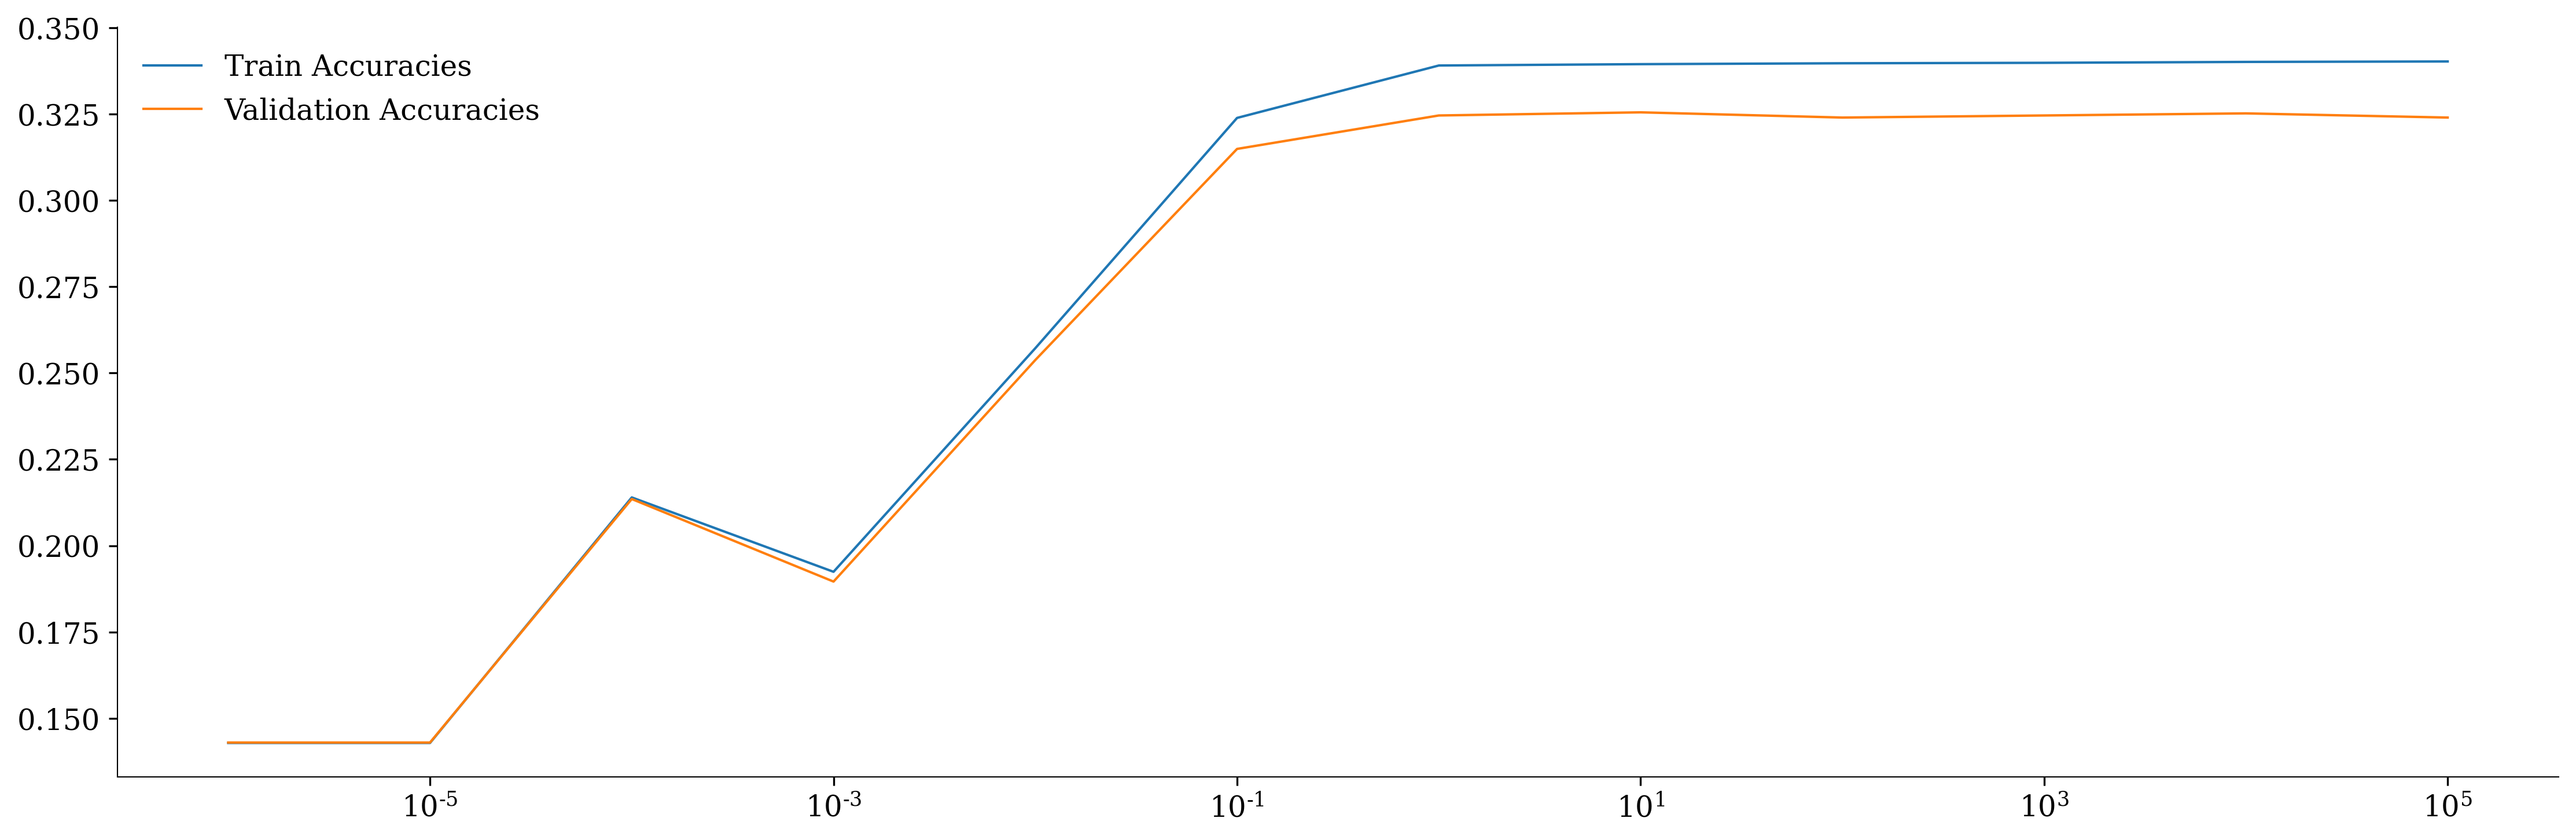

In [176]:
plt.figure(dpi=300)
sns.lineplot(x=c_values, y=train_accuracies, label='Train Accuracies')
sns.lineplot(x=c_values, y=validation_accuracies, label='Validation Accuracies')
plt.xscale('log')
plt.legend()
plt.show()

In [177]:
print(f'The highest validation accuracy was achieved with a c value of {c_values[np.argmax(validation_accuracies)]}')

The highest validation accuracy was achieved with a c value of 10


In [178]:
log_reg_c = LogisticRegression(solver='liblinear', penalty='l1', C=10)
log_reg_c.fit(X_train_transformed, y_train)

print(f'Test accuracy with a c value of 10: {log_reg_c.score(X_test_transformed, y_test)}')

Test accuracy with a c value of 10: 0.31225009087604505


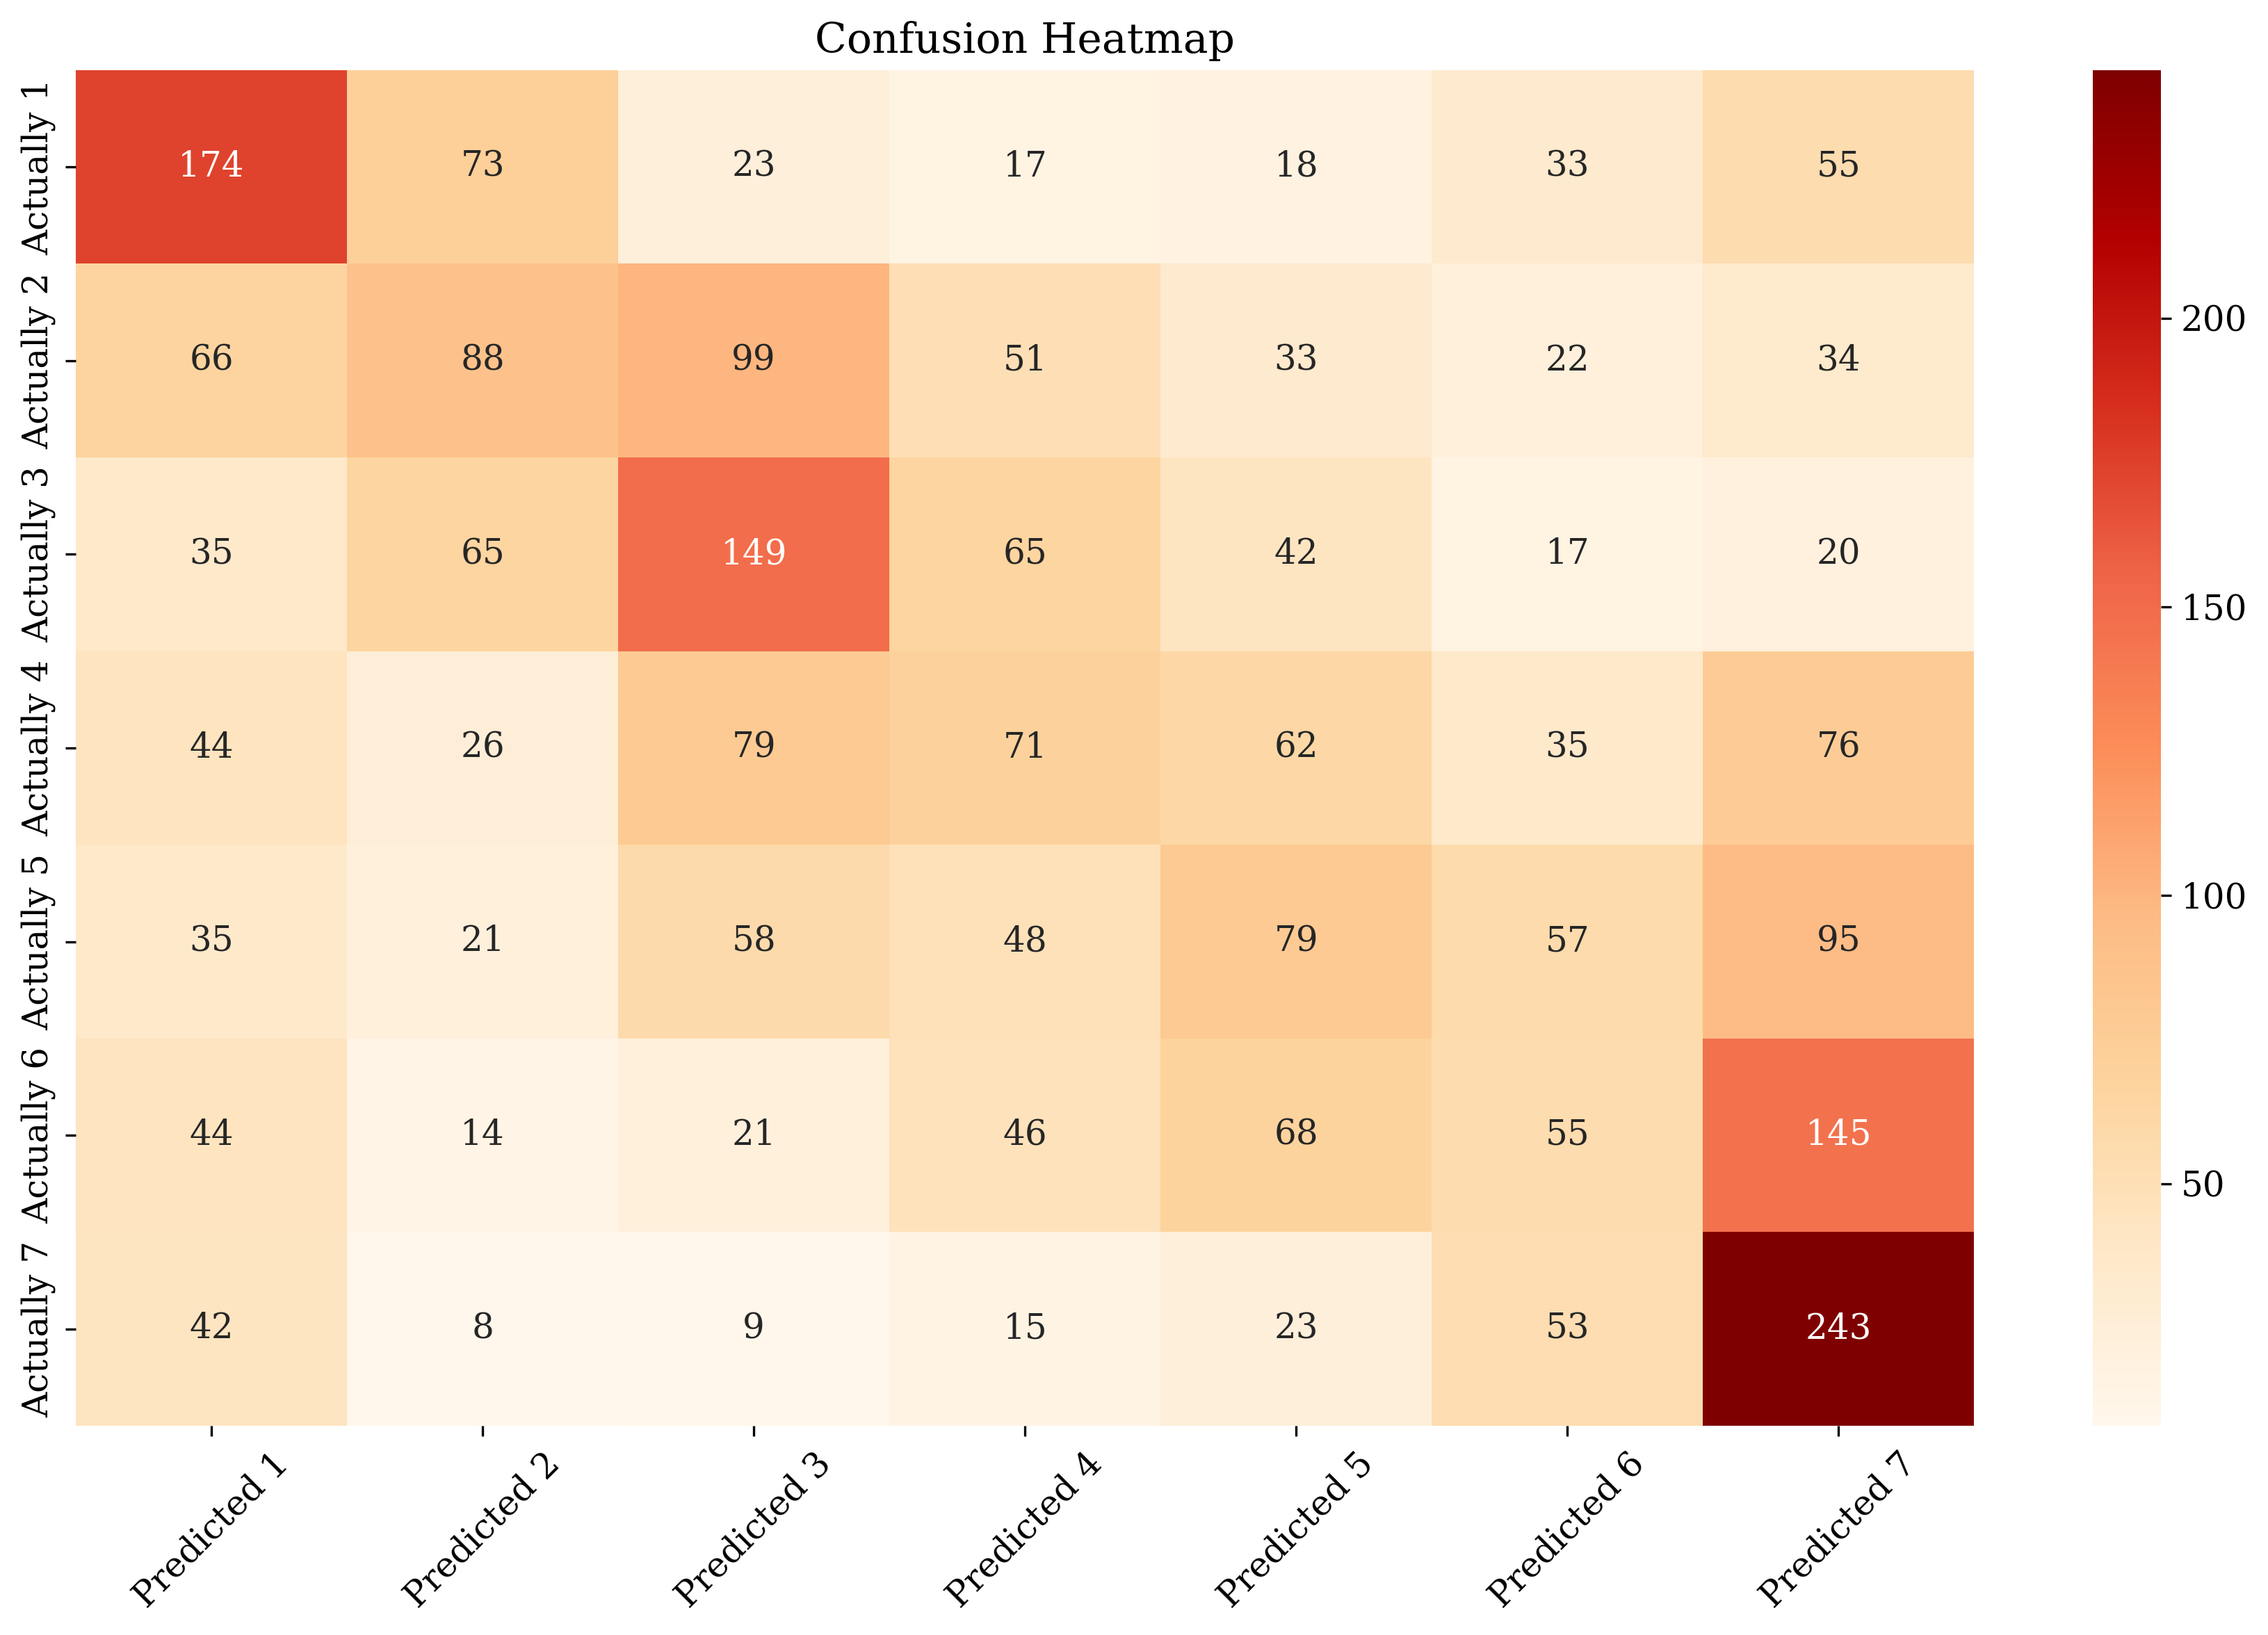

              precision    recall  f1-score   support

           A       0.40      0.44      0.42       393
           B       0.30      0.22      0.26       393
           C       0.34      0.38      0.36       393
           D       0.23      0.18      0.20       393
           E       0.24      0.20      0.22       393
           F       0.20      0.14      0.17       393
           G       0.36      0.62      0.46       393

    accuracy                           0.31      2751
   macro avg       0.30      0.31      0.30      2751
weighted avg       0.30      0.31      0.30      2751



In [179]:
import model_utils

model_utils.PlotConfusionMatrix(log_reg_c, X_test_transformed, y_test)

What are the values that the model deems the most important? Using a lower C value will reduce the number of features in the model as it will reduce their coefficients to 0. We can therefore use the L1 penalty in conjunction with a low C value to extract the most informative features.

In [180]:
logreg = LogisticRegression(solver='liblinear', penalty='l1', C=0.001)
logreg.fit(X_train_transformed, y_train)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [185]:
pd.set_option('display.max_columns', None)

In [186]:
pd.DataFrame(logreg.coef_, columns=X.columns)

FIRE_YEAR  DISCOVERY_DOY  LATITUDE  LONGITUDE  avg_tempmax  avg_temp  \
0        0.0            0.0       0.0        0.0          0.0       0.0   
1        0.0            0.0       0.0        0.0          0.0       0.0   
2        0.0            0.0       0.0        0.0          0.0       0.0   
3        0.0            0.0       0.0        0.0          0.0       0.0   
4        0.0            0.0       0.0        0.0          0.0       0.0   
5        0.0            0.0       0.0        0.0          0.0       0.0   
6        0.0            0.0       0.0        0.0          0.0       0.0   

   avg_humidity  avg_precip  avg_dew  avg_windspeed  avg_winddir  \
0           0.0         0.0      0.0            0.0          0.0   
1           0.0         0.0      0.0            0.0          0.0   
2           0.0         0.0      0.0            0.0          0.0   
3           0.0         0.0      0.0            0.0          0.0   
4           0.0         0.0      0.0            0.0          0.0   
5           0.0         0.0      0.0            0.0          0.0   
6           0.0         0.0      0.0            0.0          0.0   

   avg_pressure  ch4  co2  n2o  tempmax_variance  tempmax_delta  \
0           0.0  0.0  0.0  0.0               0.0            0.0   
1           0.0  0.0  0.0  0.0               0.0            0.0   
2           0.0  0.0  0.0  0.0               0.0            0.0   
3           0.0  0.0  0.0  0.0               0.0            0.0   
4           0.0  0.0  0.0  0.0               0.0            0.0   
5           0.0  0.0  0.0  0.0               0.0            0.0   
6           0.0  0.0  0.0  0.0               0.0            0.0   

   temp_variance  temp_delta  humidity_variance  humidity_delta  \
0            0.0         0.0                0.0             0.0   
1            0.0         0.0                0.0             0.0   
2            0.0         0.0                0.0             0.0   
3            0.0         0.0                0.0             0.0   
4            0.0         0.0                0.0             0.0   
5            0.0         0.0                0.0             0.0   
6            0.0         0.0                0.0             0.0   

   precip_variance  precip_delta  dew_variance  dew_delta  windspeed_variance  \
0              0.0           0.0           0.0        0.0                 0.0   
1              0.0           0.0           0.0        0.0                 0.0   
2              0.0           0.0           0.0        0.0                 0.0   
3              0.0           0.0           0.0        0.0                 0.0   
4              0.0           0.0           0.0        0.0                 0.0   
5              0.0           0.0           0.0        0.0                 0.0   
6              0.0           0.0           0.0        0.0                 0.0   

   windspeed_delta  winddir_variance  winddir_delta  pressure_variance  \
0              0.0         -0.004298       0.000000                0.0   
1              0.0         -0.002333      -0.003144                0.0   
2              0.0          0.000000      -0.004084                0.0   
3              0.0         -0.006040       0.000000                0.0   
4              0.0         -0.010575       0.000000                0.0   
5              0.0         -0.010813      -0.004451                0.0   
6              0.0         -0.045883      -0.013375                0.0   

   pressure_delta  state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  \
0        0.002008       0.0       0.0       0.0       0.0       0.0       0.0   
1       -0.001021       0.0       0.0       0.0       0.0       0.0       0.0   
2       -0.003584       0.0       0.0       0.0       0.0       0.0       0.0   
3       -0.005283       0.0       0.0       0.0       0.0       0.0       0.0   
4       -0.013045       0.0       0.0       0.0       0.0       0.0       0.0   
5       -0.014581       0.0       0.0       0.0       0

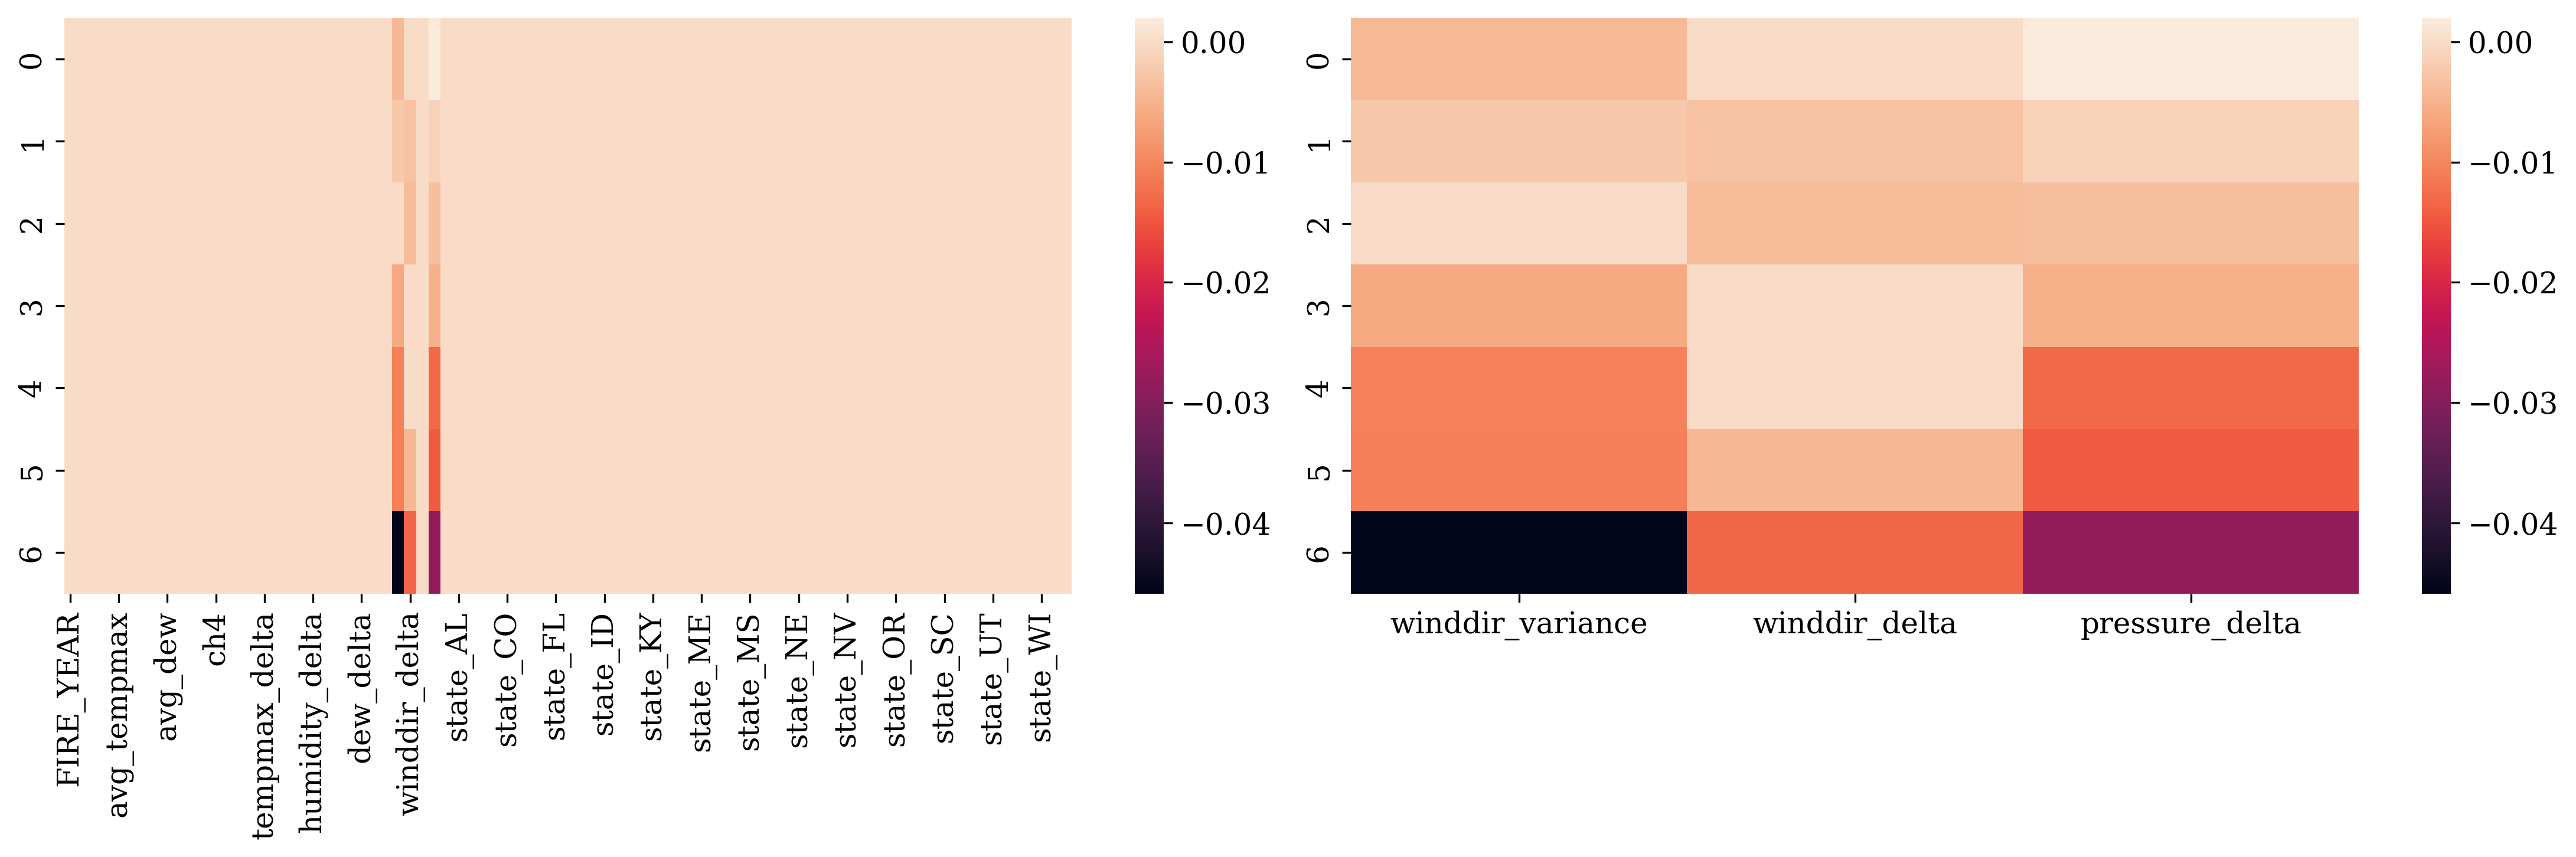

In [187]:
plt.subplots(1, 2, dpi=300)

# General Overview
plt.subplot(1, 2, 1)
sns.heatmap(pd.DataFrame(logreg.coef_, columns=X.columns))

# Specific features
plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame(logreg.coef_, columns=X.columns).loc[:, ['winddir_variance', 'winddir_delta', 'pressure_delta']])

plt.show()

These three variables, having used the L1 penalty as a form of feature reduction, are the most important. We can therefore build another model which only looks at these values.

In [188]:
X_reduced = X.loc[:, ['winddir_variance', 'winddir_delta', 'pressure_delta']]

# Create remainder and test
X_rem, X_test, y_rem, y_test = \
train_test_split(X_reduced, y, test_size=0.2, random_state=1, stratify=y)

# Create train and validation
X_train, X_validation, y_train, y_validation = \
train_test_split(X_rem, y_rem, test_size=0.3, random_state=1, stratify=y_rem)

In [189]:
my_ss = StandardScaler()
X_train_transformed = my_ss.fit_transform(X_train)
X_test_transformed = my_ss.transform(X_test)

In [190]:
logreg_reduced = LogisticRegression(random_state=1)
logreg_reduced.fit(X_train_transformed, y_train);

In [191]:
logreg_reduced.score(X_test_transformed, y_test)

0.15921483097055616

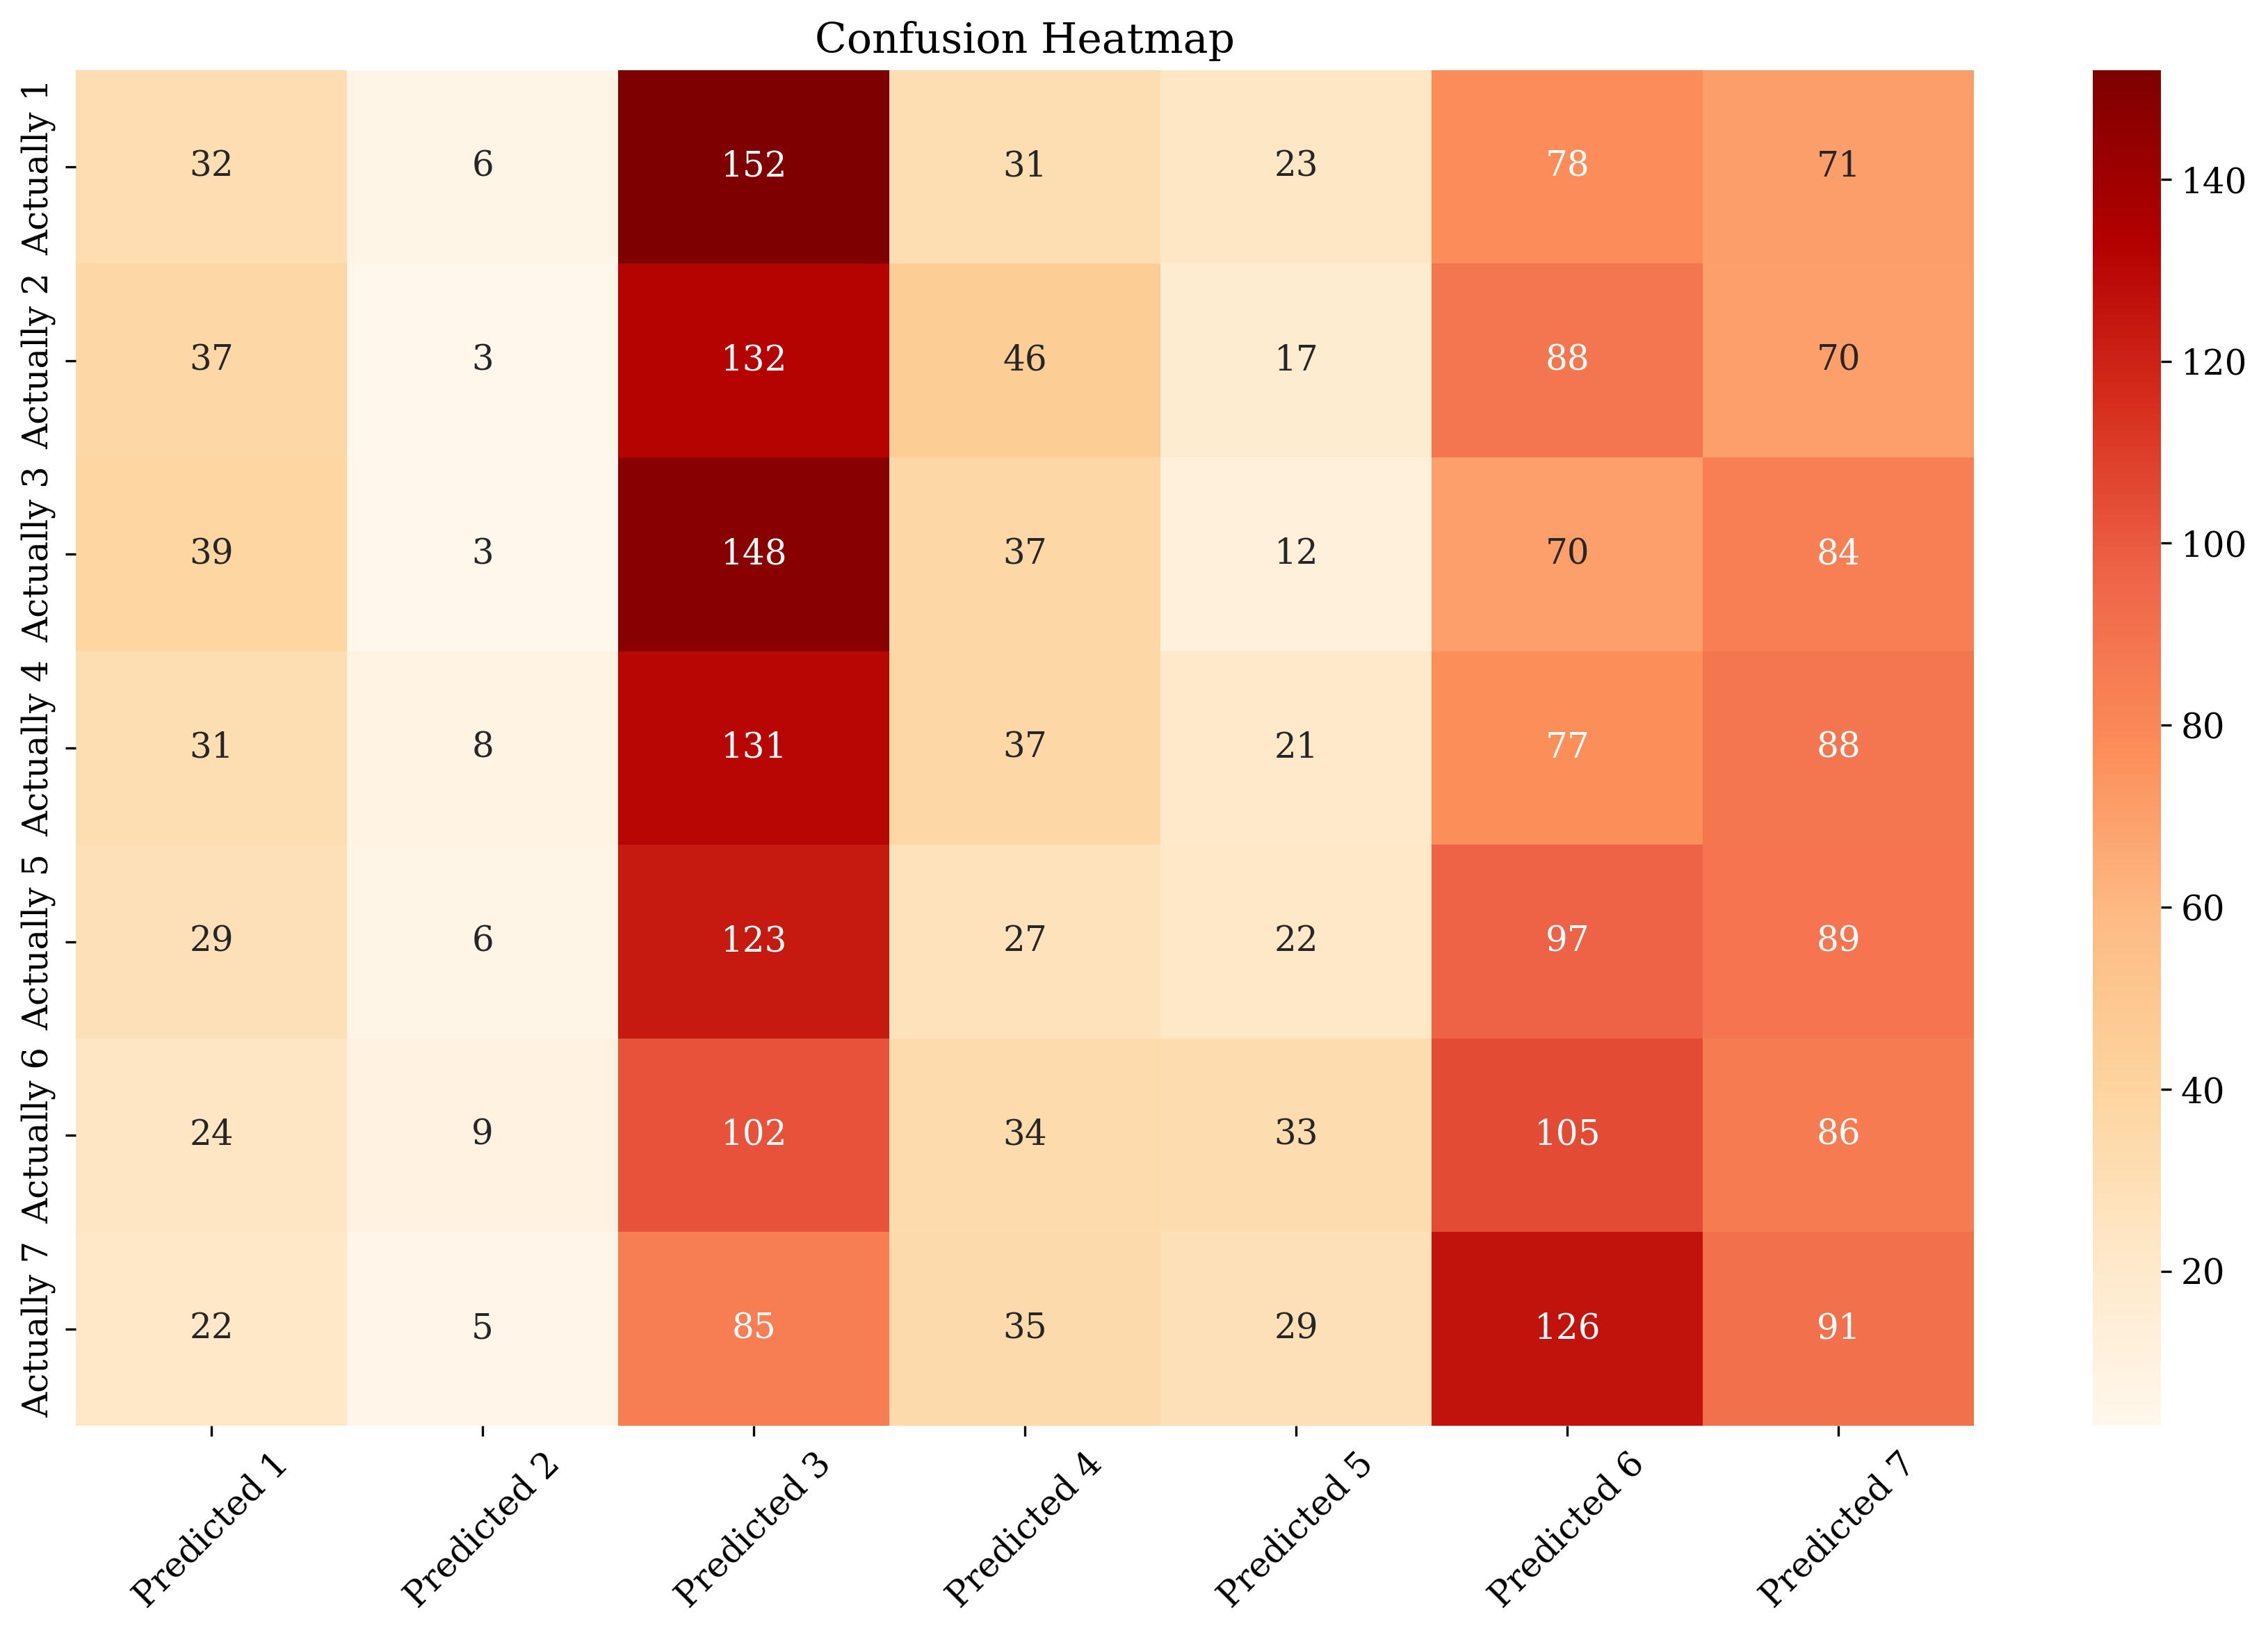

              precision    recall  f1-score   support

           A       0.15      0.08      0.11       393
           B       0.07      0.01      0.01       393
           C       0.17      0.38      0.23       393
           D       0.15      0.09      0.12       393
           E       0.14      0.06      0.08       393
           F       0.16      0.27      0.20       393
           G       0.16      0.23      0.19       393

    accuracy                           0.16      2751
   macro avg       0.14      0.16      0.13      2751
weighted avg       0.14      0.16      0.13      2751



In [192]:
model_utils.PlotConfusionMatrix(logreg_reduced, X_test_transformed, y_test)

## Reducing Dimensionality with PCA

In [193]:
from sklearn.decomposition import PCA

# Create train, validate, test split
X_train, X_validation, X_test, y_train, y_validation, y_test = model_utils.train_validate_test(X,y)

# Fit transformer
col_transformer.fit(X_train)

# Transform X_train, X_validation, X_test
X_train_transformed = col_transformer.transform(X_train)
X_validation_transformed = col_transformer.transform(X_validation)
X_test_transformed = col_transformer.transform(X_test)

# Instantiate PCA
my_pca = PCA()

# Fit to scaled data
X_train_pca = my_pca.fit_transform(X_train_transformed)
X_validation_pca = my_pca.transform(X_validation_transformed)

In [194]:
X_train_pca.shape

(7702, 83)

In [196]:
logreg = LogisticRegression(max_iter=10000, random_state=1)
logreg.fit(X_train_pca, y_train)
logreg.score(X_validation_pca, y_validation)

0.321320411871593

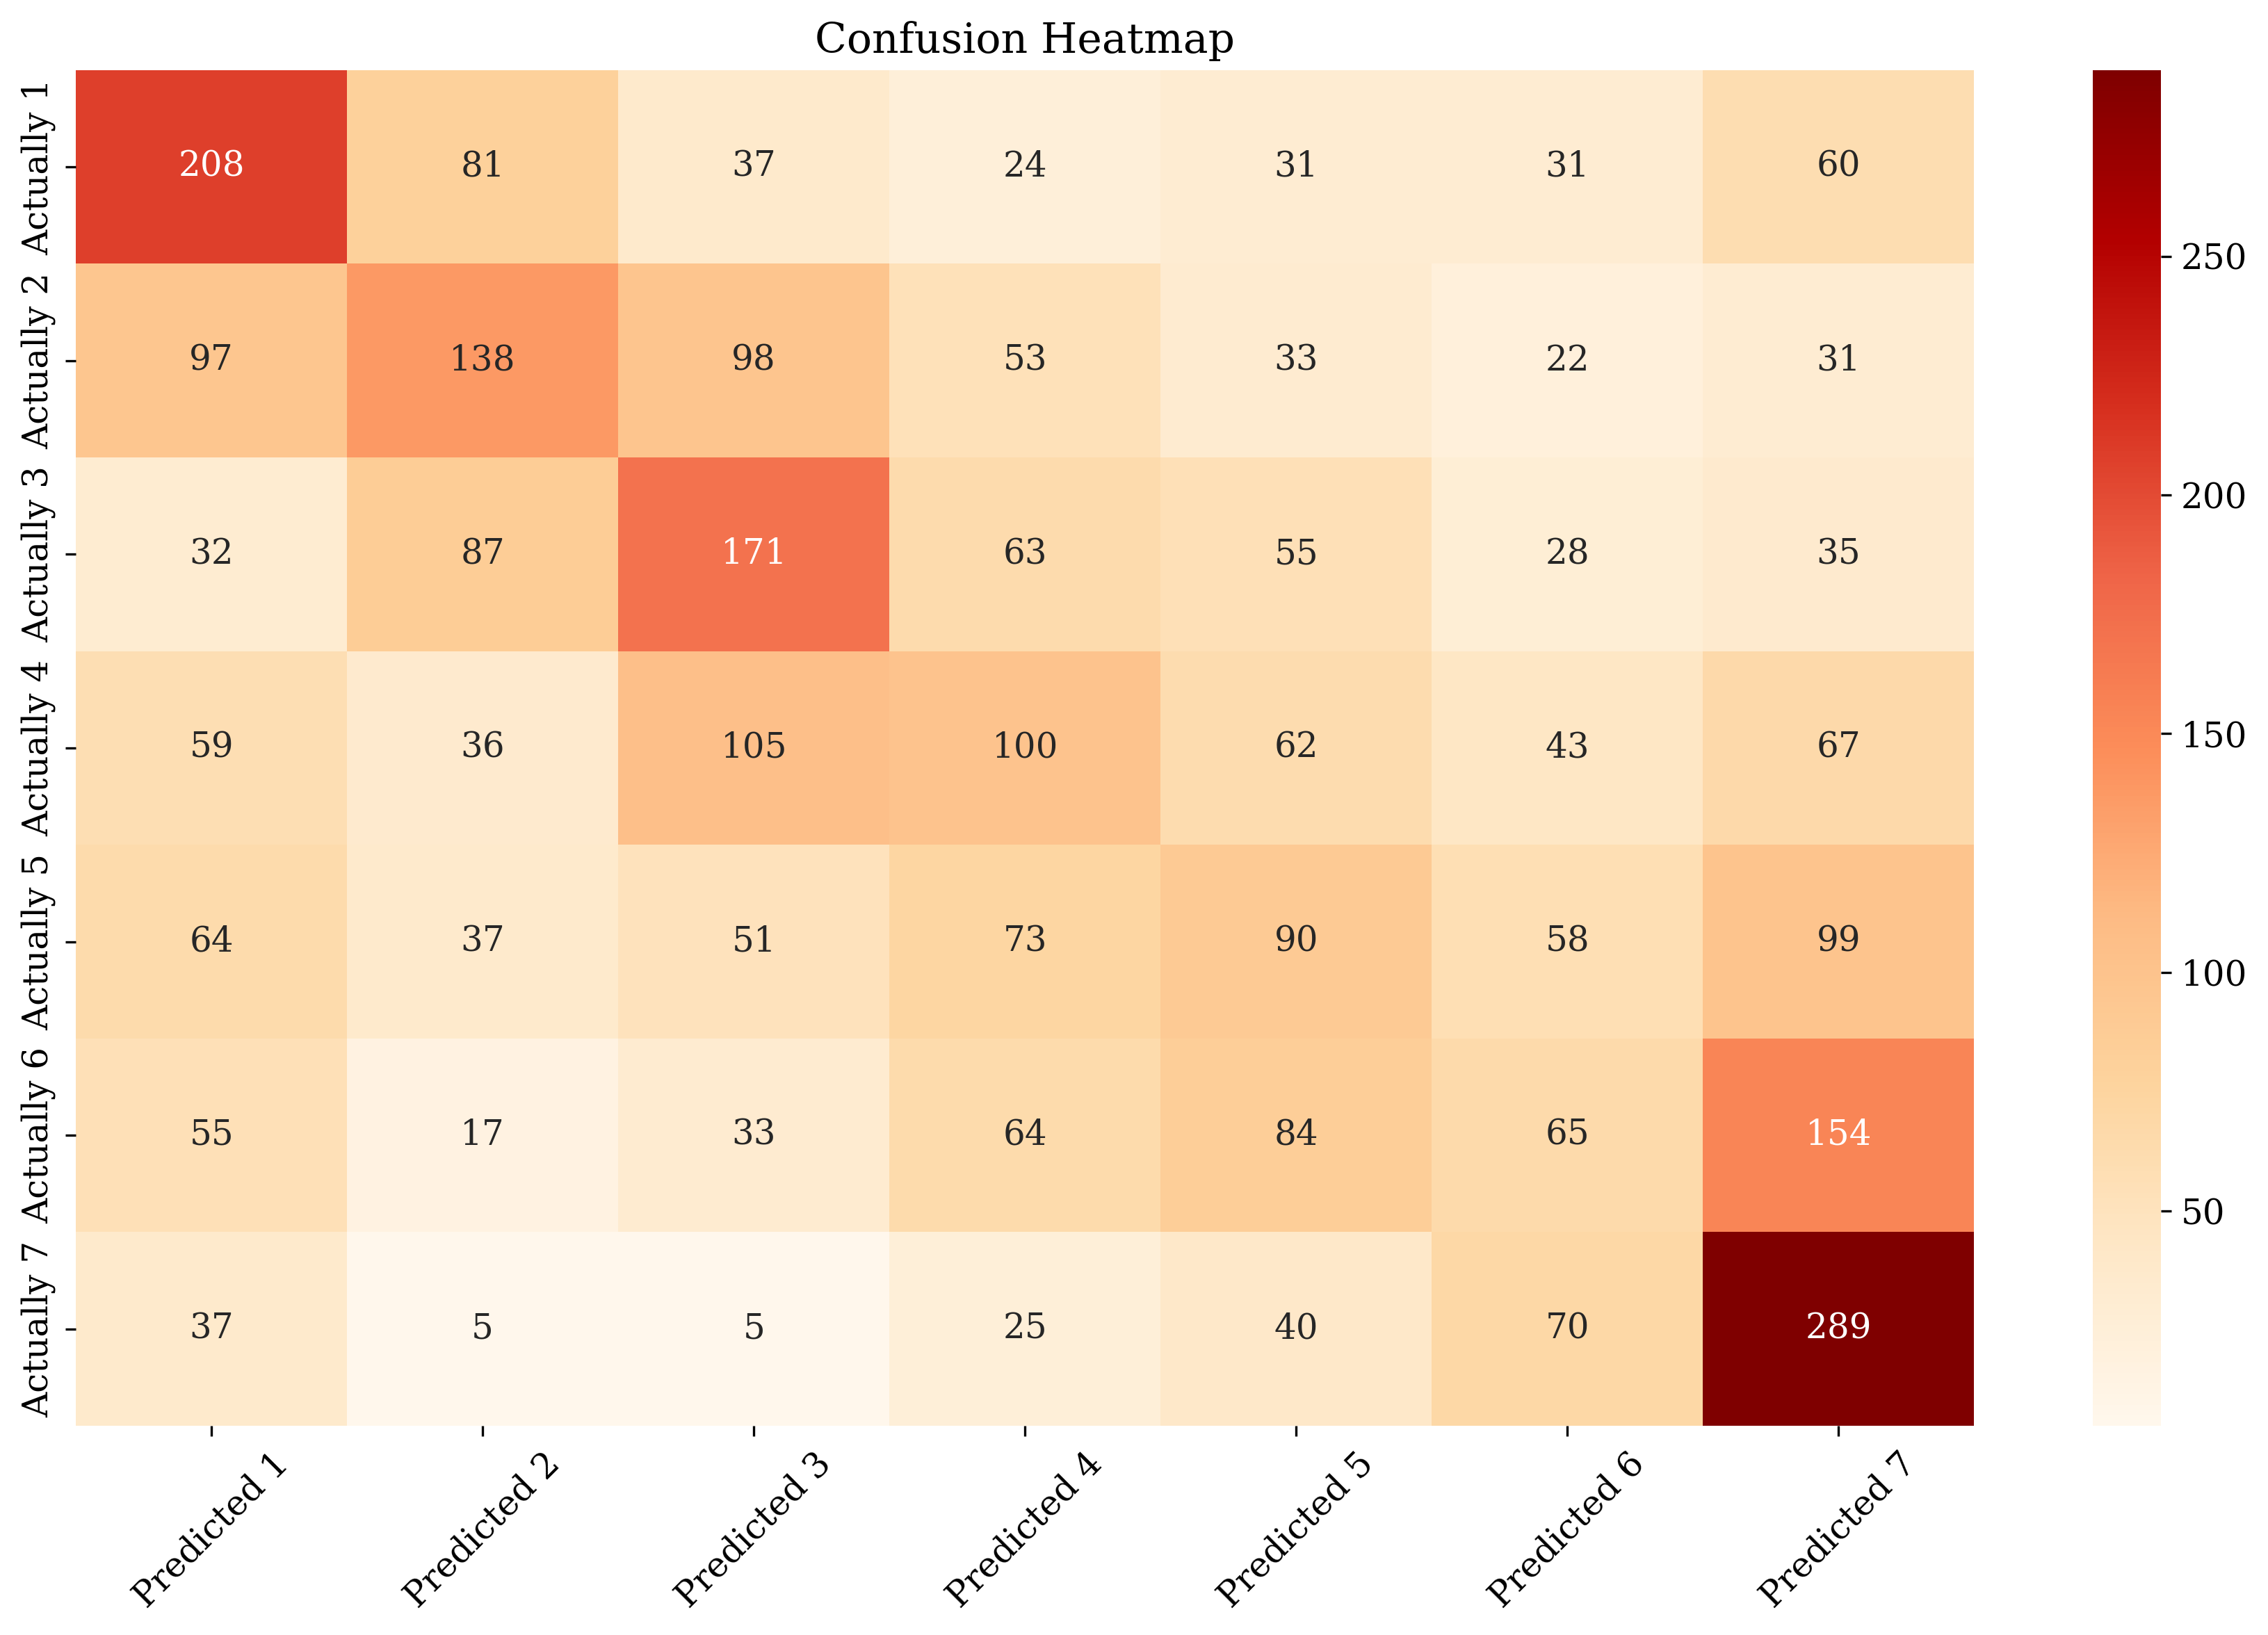

              precision    recall  f1-score   support

           A       0.38      0.44      0.41       472
           B       0.34      0.29      0.32       472
           C       0.34      0.36      0.35       471
           D       0.25      0.21      0.23       472
           E       0.23      0.19      0.21       472
           F       0.21      0.14      0.16       472
           G       0.39      0.61      0.48       471

    accuracy                           0.32      3302
   macro avg       0.31      0.32      0.31      3302
weighted avg       0.31      0.32      0.31      3302



In [197]:
model_utils.PlotConfusionMatrix(logreg, X_validation_pca, y_validation)

In [198]:
my_pca.explained_variance_ratio_

array([7.28319799e-01, 2.26097457e-01, 3.07283261e-02, 8.13461799e-03,
       1.67537919e-03, 7.93843141e-04, 6.85561953e-04, 4.45723445e-04,
       4.02475642e-04, 3.27981271e-04, 2.82563650e-04, 2.68122133e-04,
       2.47645869e-04, 1.85689013e-04, 1.71217220e-04, 1.64165200e-04,
       1.45849999e-04, 1.42718592e-04, 1.21574075e-04, 1.14162957e-04,
       9.79795760e-05, 7.98022665e-05, 3.21293252e-05, 2.92236095e-05,
       2.41574024e-05, 2.21792649e-05, 2.02421875e-05, 1.63856690e-05,
       1.42158661e-05, 1.31161332e-05, 1.24715862e-05, 1.18022904e-05,
       1.06934223e-05, 9.28018097e-06, 9.00698453e-06, 8.88544451e-06,
       8.40593046e-06, 8.01340105e-06, 7.75198649e-06, 7.15296571e-06,
       6.66340281e-06, 6.50166063e-06, 6.19021443e-06, 5.85124466e-06,
       5.60145006e-06, 5.53736148e-06, 5.13503101e-06, 4.64027316e-06,
       4.54471587e-06, 4.37210668e-06, 4.27891167e-06, 4.20427041e-06,
       3.97436844e-06, 3.90853586e-06, 3.24025716e-06, 3.20775030e-06,
      

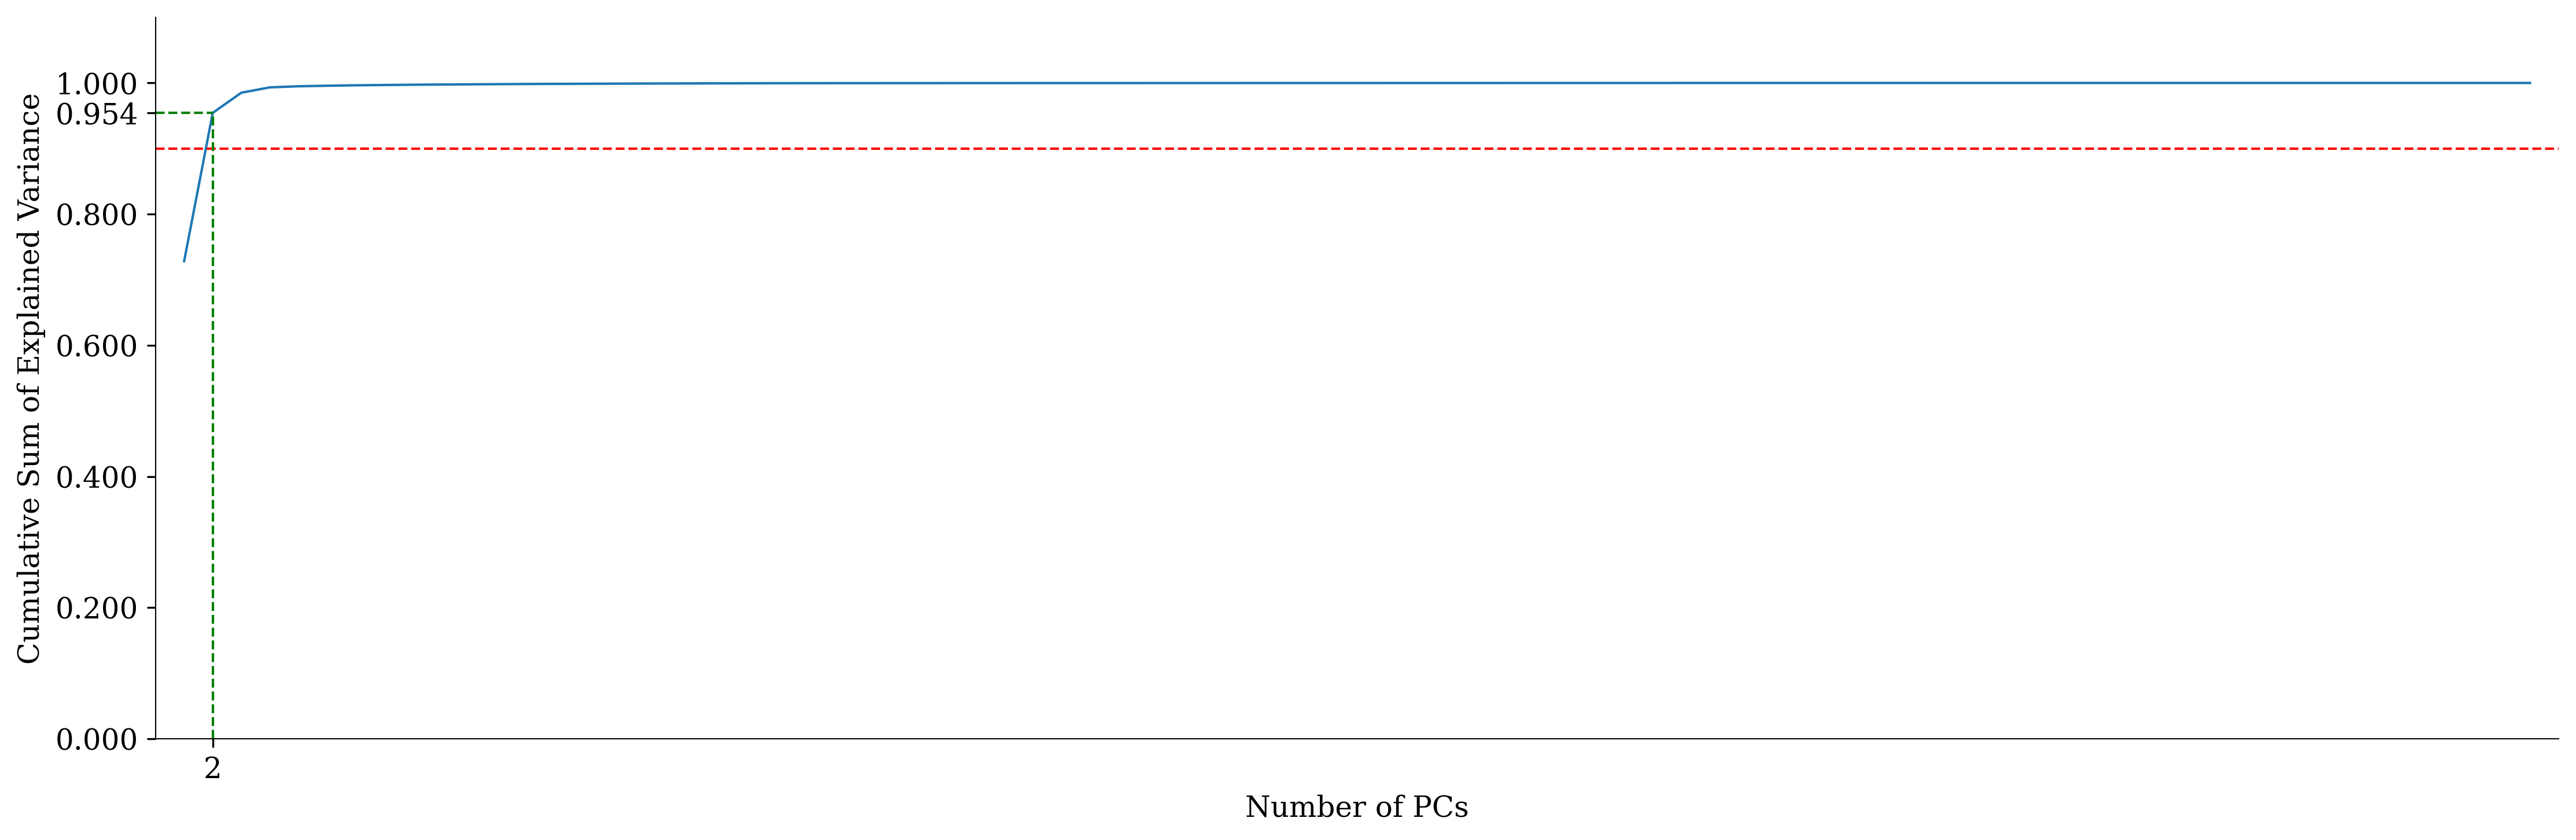

In [199]:
utils.PlotVarianceRatio(my_pca)

In [200]:
# Instantiate PCA
my_pca = PCA(n_components=0.9)

# Fit to scaled data
X_train_pca = my_pca.fit_transform(X_train_transformed)
X_validation_pca = my_pca.transform(X_validation_transformed)

In [201]:
logreg = LogisticRegression(max_iter=10000, random_state=1)
logreg.fit(X_train_pca, y_train)
logreg.score(X_validation_pca, y_validation)

0.18655360387643852

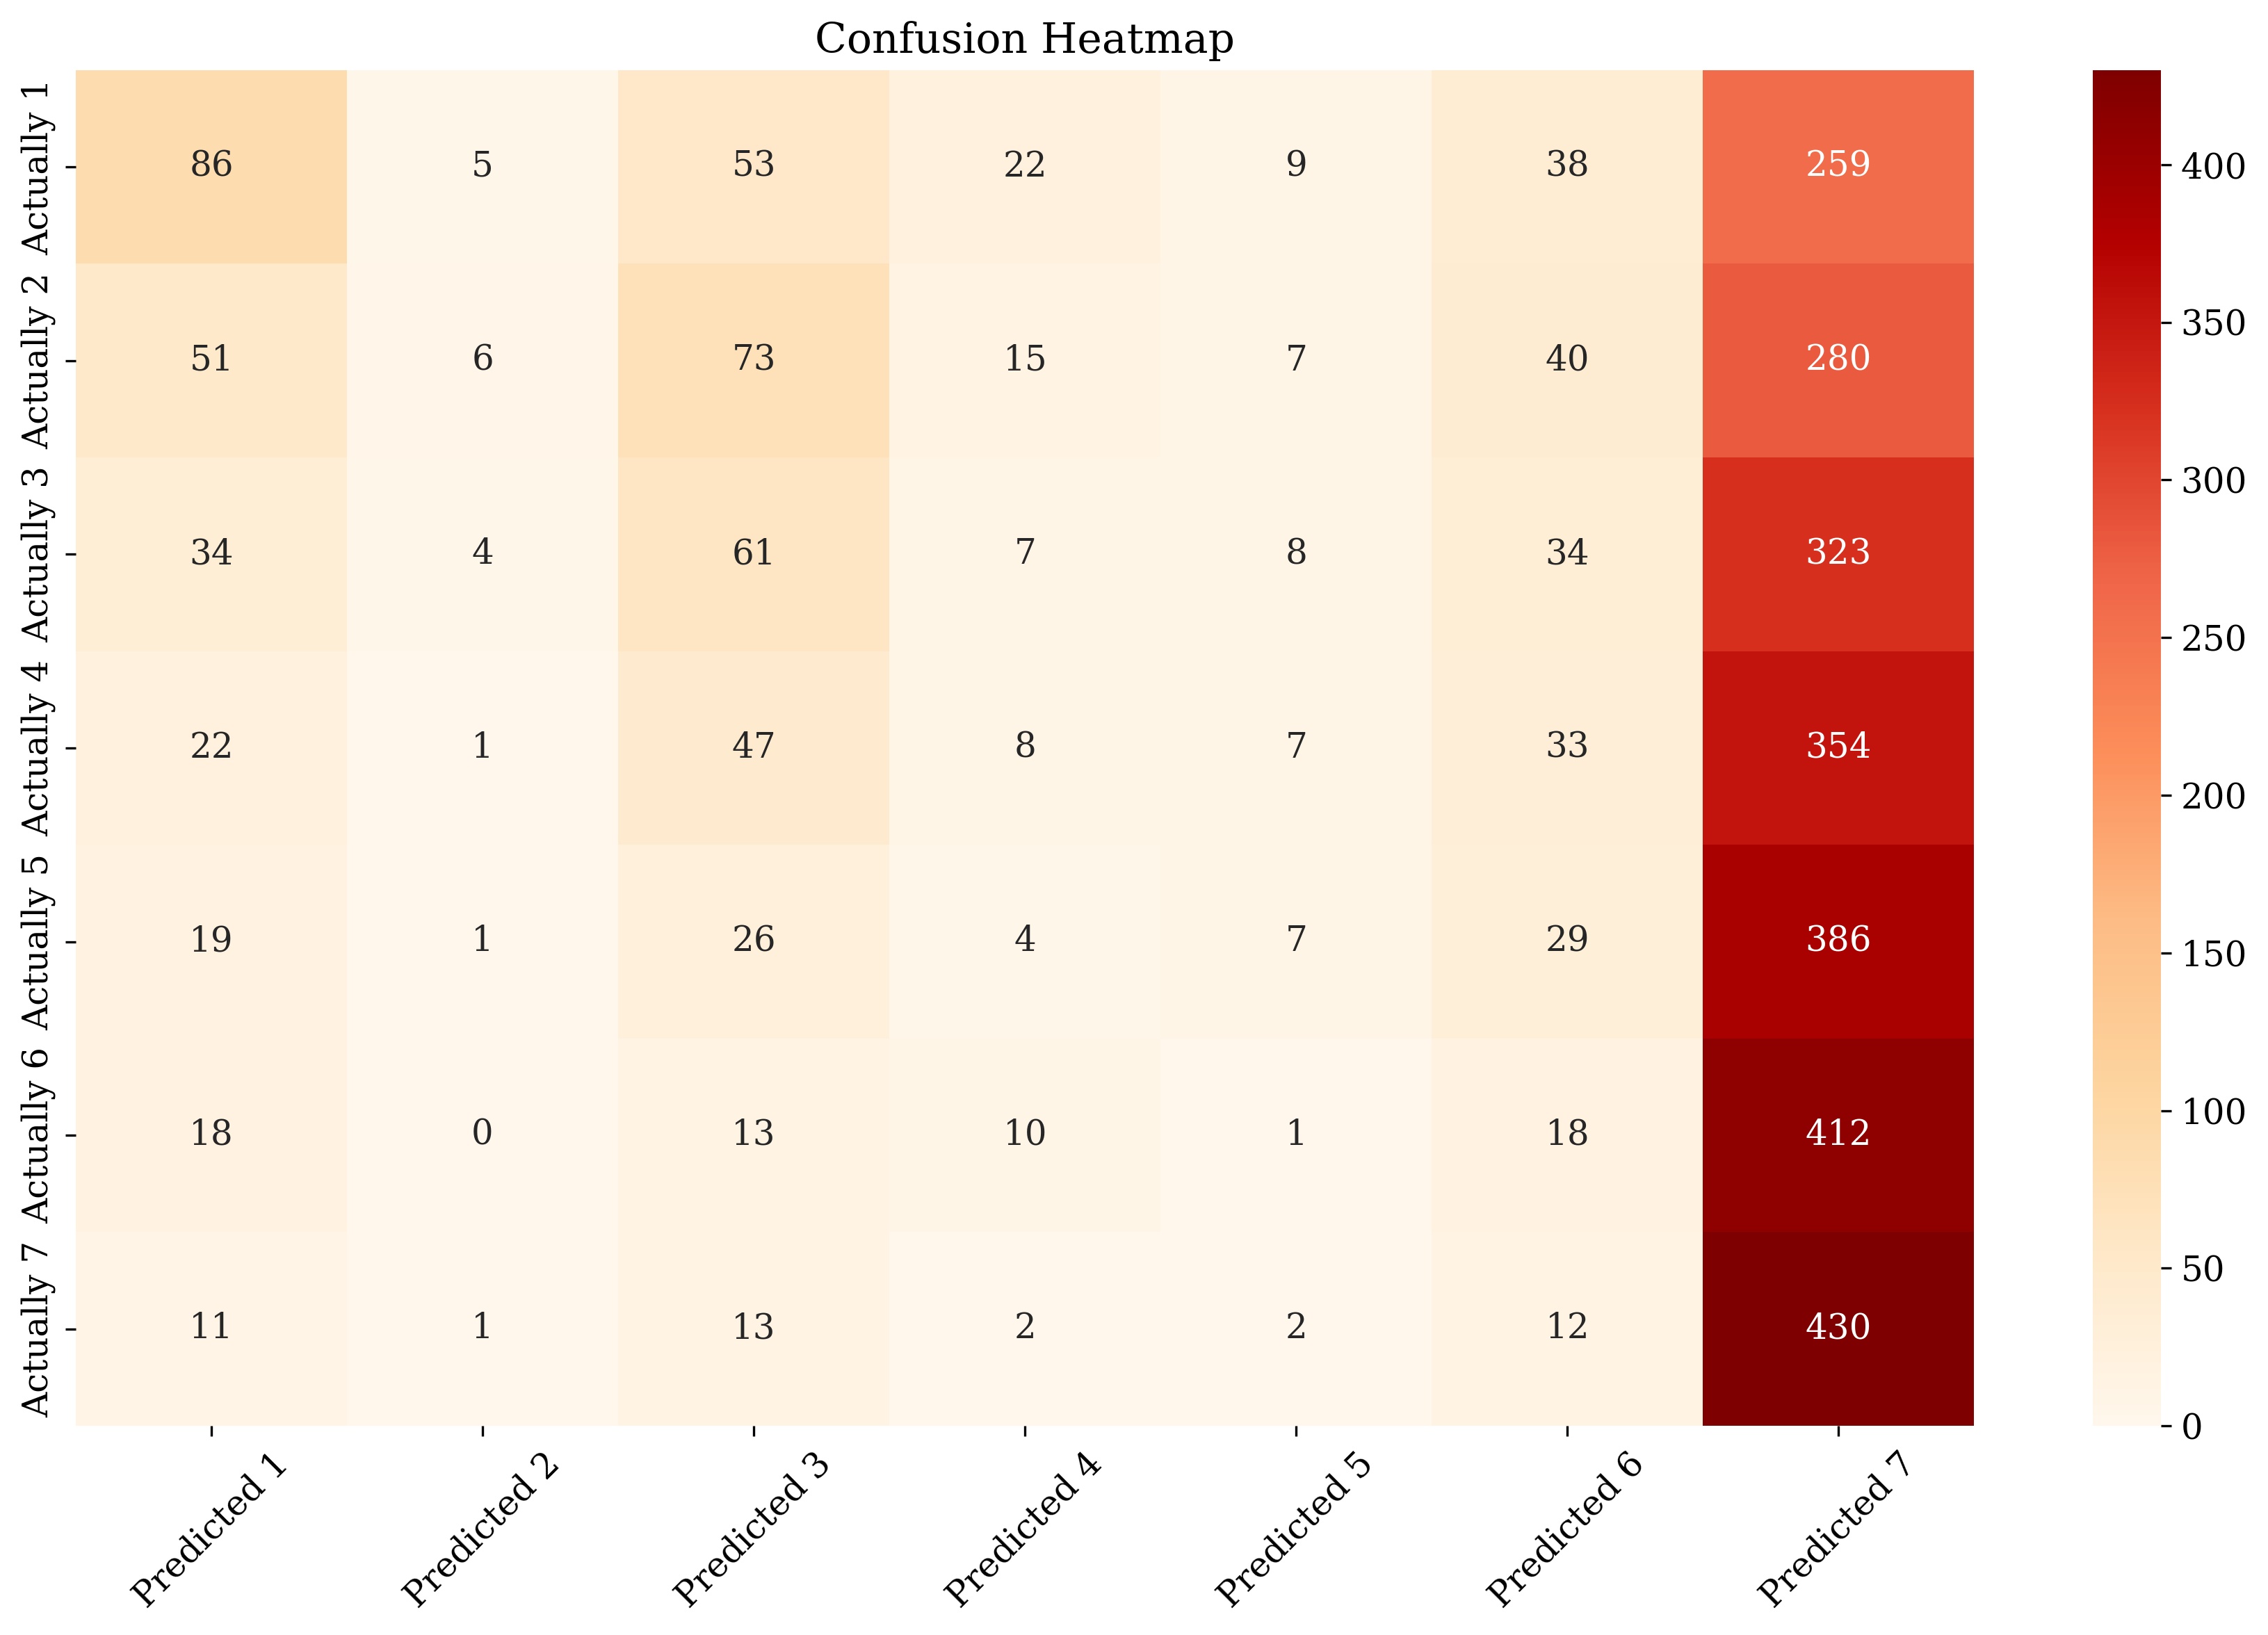

              precision    recall  f1-score   support

           A       0.36      0.18      0.24       472
           B       0.33      0.01      0.02       472
           C       0.21      0.13      0.16       471
           D       0.12      0.02      0.03       472
           E       0.17      0.01      0.03       472
           F       0.09      0.04      0.05       472
           G       0.18      0.91      0.30       471

    accuracy                           0.19      3302
   macro avg       0.21      0.19      0.12      3302
weighted avg       0.21      0.19      0.12      3302



In [202]:
model_utils.PlotConfusionMatrix(logreg, X_validation_pca, y_validation)

## Upsampling

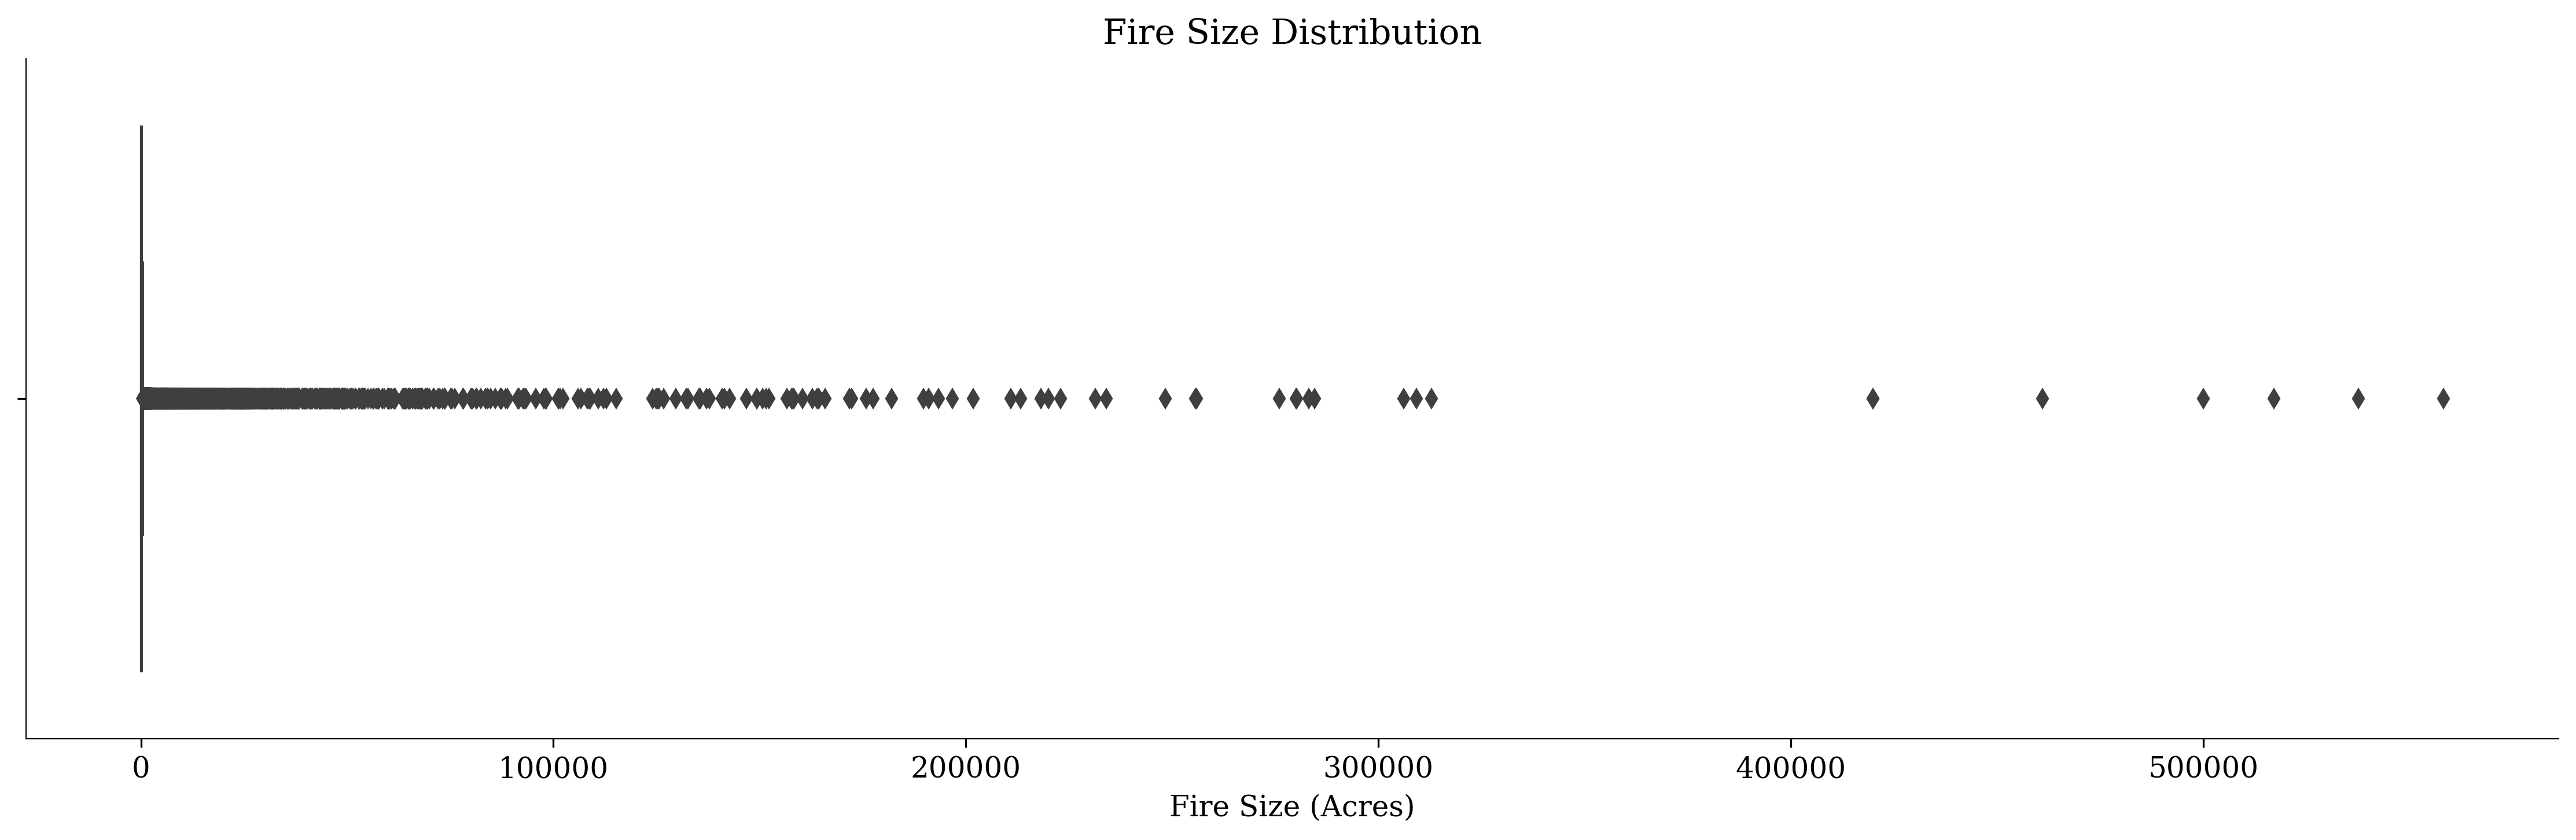

In [205]:
plt.figure(dpi=300, figsize=(15, 5))
plt.title('Fire Size Distribution')
sns.boxplot(x=df['FIRE_SIZE'])
plt.xlabel('Fire Size (Acres)')
plt.show()

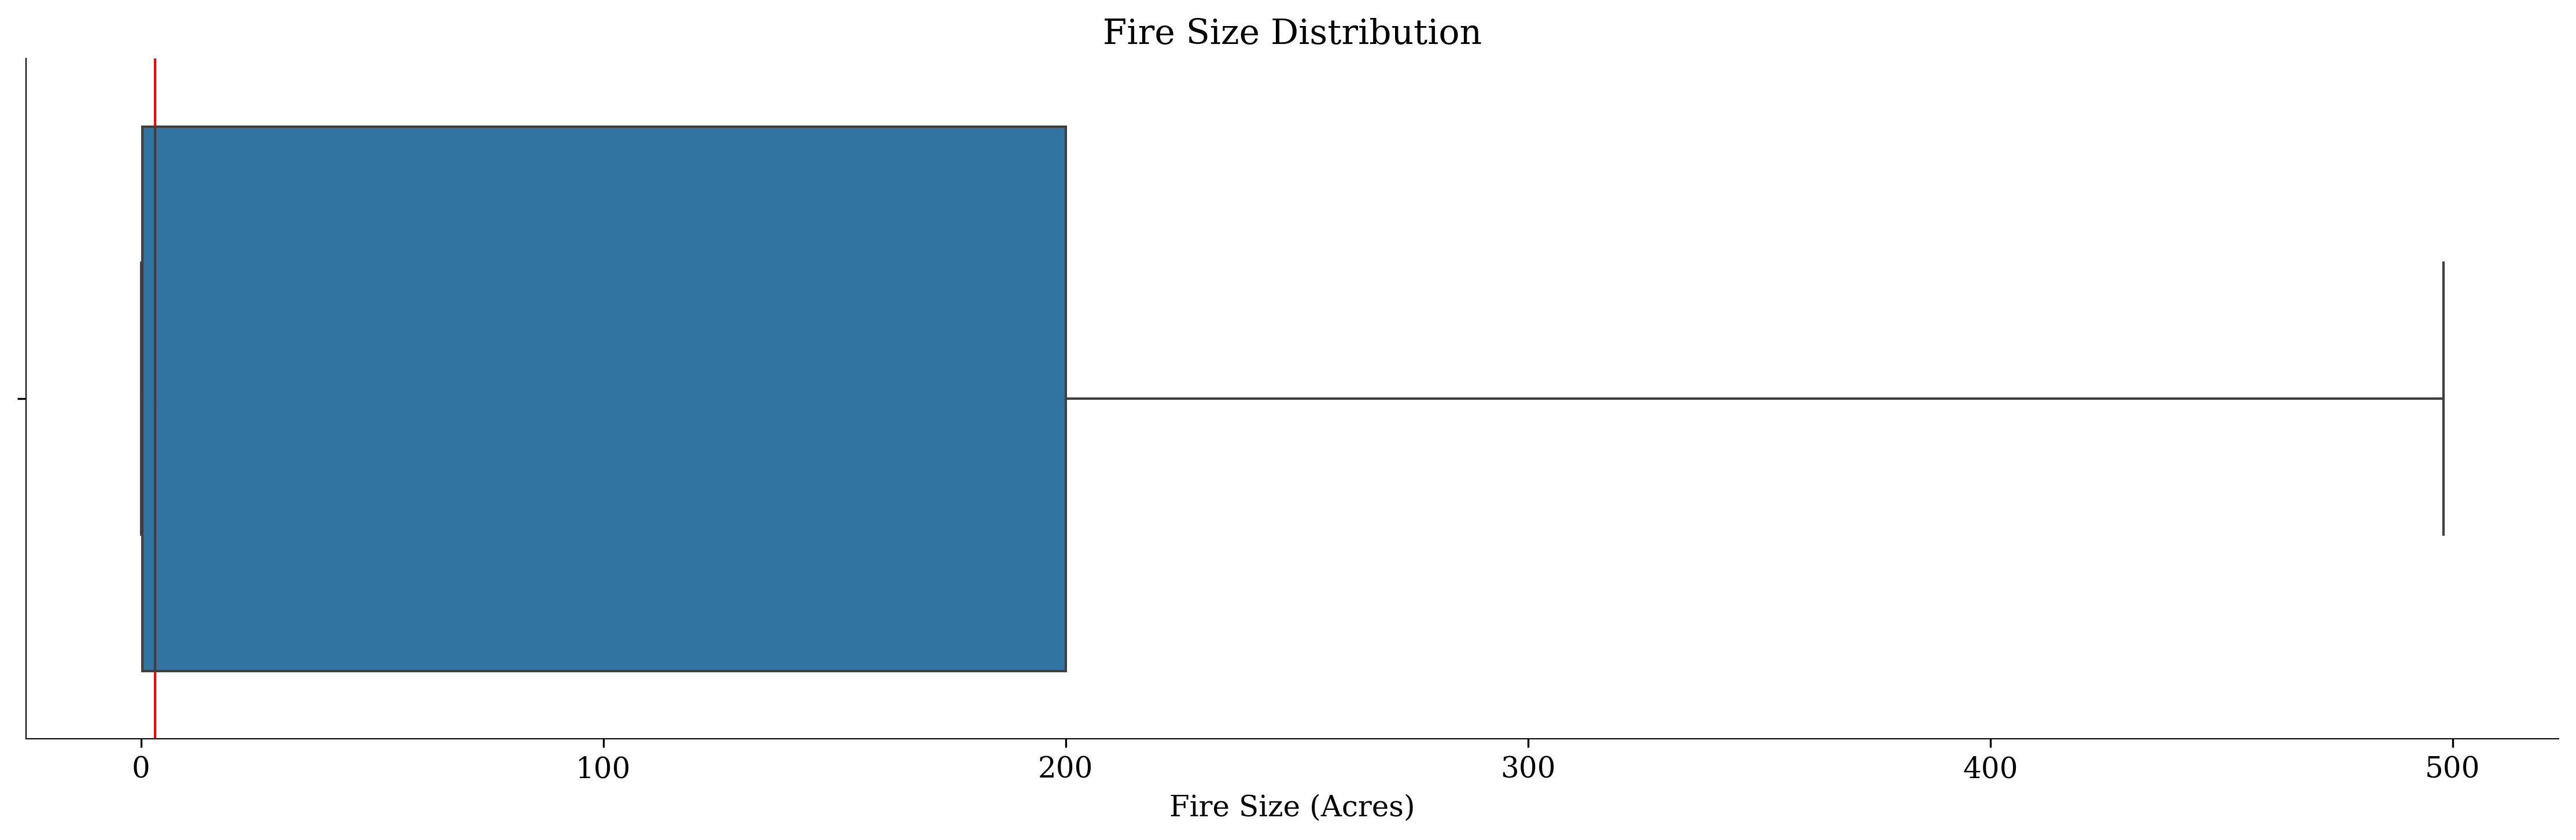

In [206]:
plt.figure(dpi=300, figsize=(15, 5))
plt.title('Fire Size Distribution')
plt.axvline(x=df['FIRE_SIZE'].median(), color='red')
sns.boxplot(x=df['FIRE_SIZE'], showfliers=False)
plt.xlabel('Fire Size (Acres)')
plt.show()

Median is incredibly low, how are we able to split these into equally sized chunks.

In [207]:
# Upsampling using resample
from sklearn.utils import resample

# Get X and y variables
X, y = model_utils.GenerateXy(df)

# Create train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Print Distribution of classes
utils.count_percentage_df(y_train)

Count  Percentage of Total
B   8409             0.353512
A   5851             0.245975
D   2172             0.091310
E   2023             0.085046
C   1990             0.083659
F   1791             0.075293
G   1551             0.065204

In [208]:
filter = ~((y_train == 'B') + (y_train =='A'))

X_upsampled, y_upsampled = resample(X_train[filter], 
                                    y_train[filter],
                                    n_samples=X_train[y_train=='B'].shape[0]*5,
                                    random_state=1)

In [209]:
utils.count_percentage_df(y_upsampled)

Count  Percentage of Total
D   9692             0.230515
E   8939             0.212606
C   8794             0.209157
F   7762             0.184612
G   6858             0.163111

In [210]:
# Combine upsample with original data
X_train_bal = np.vstack((X_train[(y_train == 'B') + (y_train =='A')], X_upsampled))
y_train_bal = np.hstack((y_train[(y_train == 'B') + (y_train =='A')], y_upsampled))

In [211]:
utils.count_percentage_df(pd.Series(y_train_bal))

Count  Percentage of Total
D   9692             0.172134
E   8939             0.158760
C   8794             0.156185
B   8409             0.149347
F   7762             0.137856
G   6858             0.121801
A   5851             0.103916

In [212]:
X_train_bal = pd.DataFrame(X_train_bal, columns=X.columns)

In [213]:
X_train_bal_transformed = col_transformer.fit_transform(X_train_bal)

In [214]:
logreg_balanced = LogisticRegression(max_iter=10000, random_state=1)
logreg_balanced.fit(X_train_bal_transformed, y_train_bal)

LogisticRegression(max_iter=10000, random_state=1)

In [215]:
logreg_balanced.score(X_test, y_test)

/Users/ejb/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.06961493189843619

/Users/ejb/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


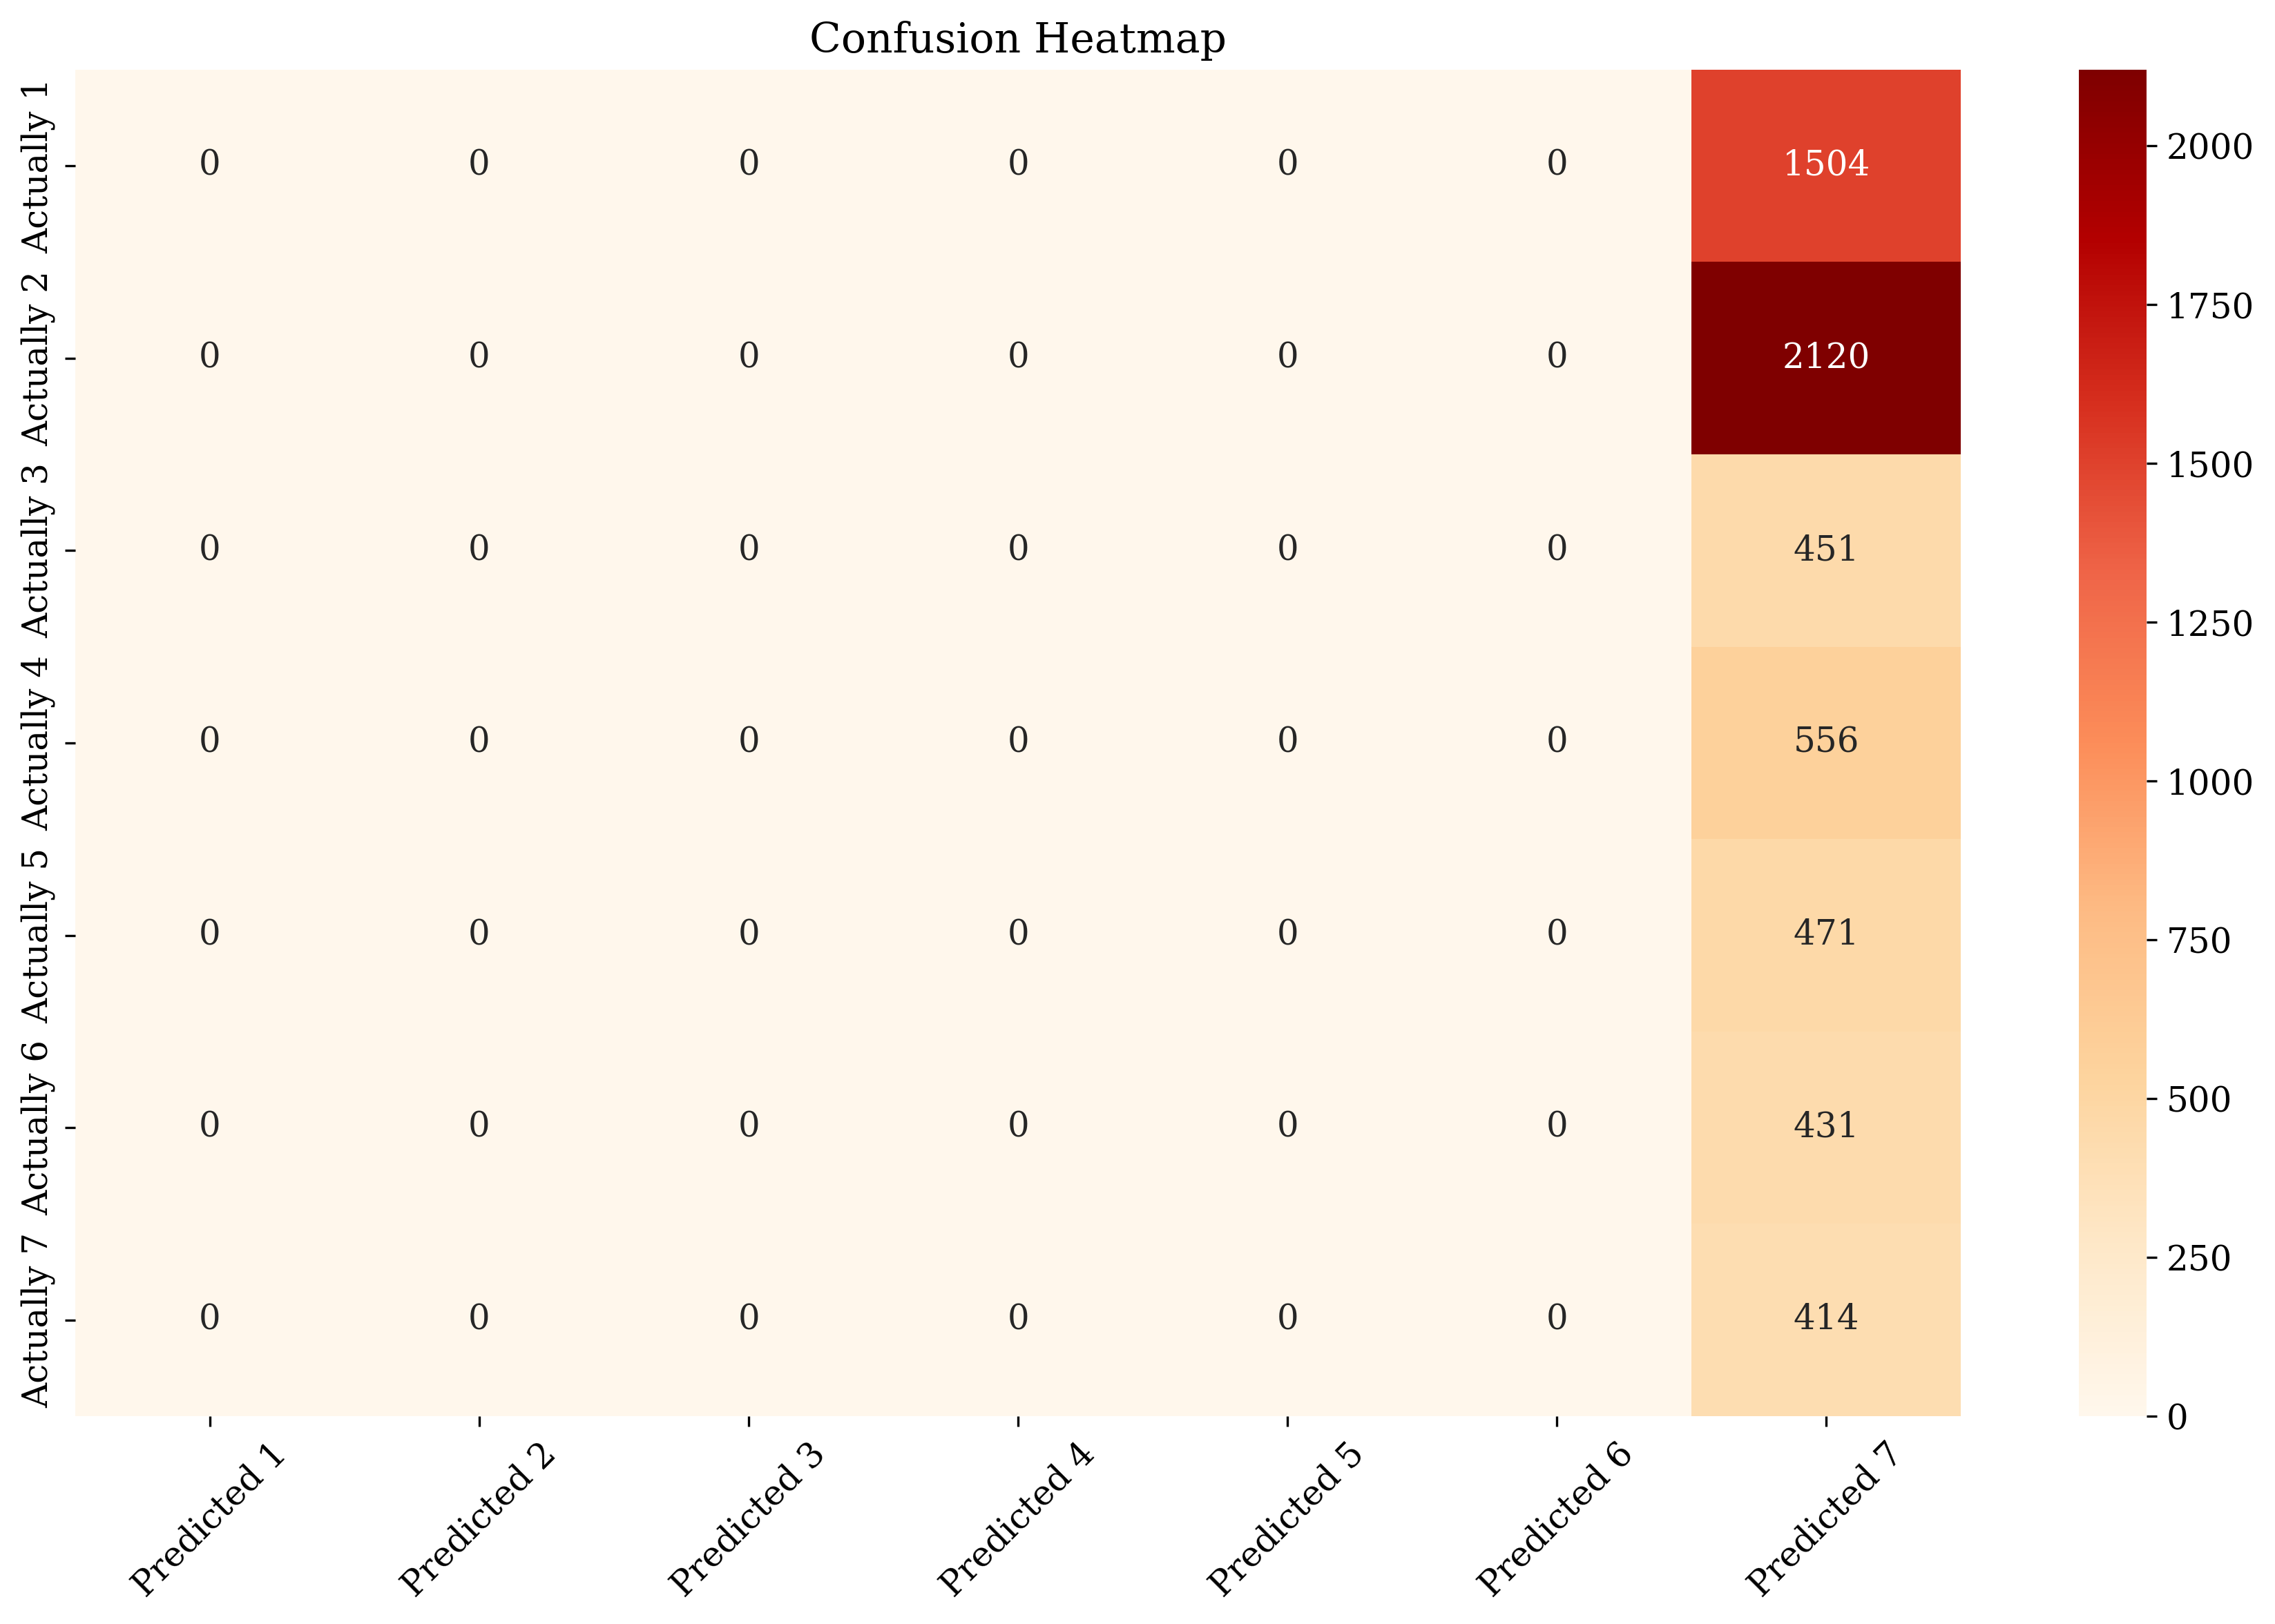

              precision    recall  f1-score   support

           A       0.00      0.00      0.00      1504
           B       0.00      0.00      0.00      2120
           C       0.00      0.00      0.00       451
           D       0.00      0.00      0.00       556
           E       0.00      0.00      0.00       471
           F       0.00      0.00      0.00       431
           G       0.07      1.00      0.13       414

    accuracy                           0.07      5947
   macro avg       0.01      0.14      0.02      5947
weighted avg       0.00      0.07      0.01      5947



/Users/ejb/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ejb/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ejb/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
model_utils.PlotConfusionMatrix(logreg_balanced, X_test, y_test)

## SMOTE